## Initialization

In [ ]:
# A collection of header files needed to run most of the cells

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.utils.fixes import linspace
from sklearn.metrics import r2_score

## LaTeX Graph Settings

In [ ]:
# Import graph and font settings from LaTeX

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
! sudo apt-get install texlive-latex-recommended 
! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 
!apt install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-d

## Preprocessing


In [ ]:
data = pd.read_csv('ShellThickness_10000pts_seed92.csv')

Verify that all the data has been uploaded properly.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   PoissonsRatio           10000 non-null  float64
 2   E                       10000 non-null  int64  
 3   ThermalExpansion        10000 non-null  float64
 4   InnerRadius             10000 non-null  float64
 5   OuterRadius             10000 non-null  float64
 6   InnerTemp               10000 non-null  float64
 7   OuterTemp               10000 non-null  float64
 8   ThicknessChange         10000 non-null  float64
 9   PercentThicknessChange  10000 non-null  float64
 10  YieldStress             10000 non-null  int64  
 11  TempDiff                10000 non-null  float64
 12  TempDiff_for_Yield      10000 non-null  float64
dtypes: float64(10), int64(3)
memory usage: 1015.8 KB


## Exploratory Data Analysis

View some of the data.

In [ ]:
data

,Unnamed: 0,PoissonsRatio,E,ThermalExpansion,InnerRadius,OuterRadius,InnerTemp,OuterTemp,ThicknessChange,PercentThicknessChange,YieldStress,TempDiff,TempDiff_for_Yield
0,1,0.05,274963176062,0.000019,0.349704,1.161172,60.850524,121.833290,0.001732,0.213391,280719517,60.982766,60.98
1,2,0.24,157115249336,0.000016,0.624374,0.883991,128.775652,263.986620,0.000859,0.330990,267848510,135.210968,135.21
2,3,0.07,201347914159,0.000018,0.503166,0.789903,112.375774,156.150195,0.000707,0.246408,107741336,43.774421,43.77
3,4,0.22,76687027854,0.000007,1.106494,1.271535,93.803190,287.237049,0.000221,0.134003,391134516,193.433859,1086.63
4,5,0.20,345899561776,0.000029,0.440460,1.151209,163.173818,184.293644,0.003680,0.517800,204774125,21.119826,21.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,0.24,88133103773,0.000021,0.211720,0.318512,26.975601,116.153576,0.000183,0.171158,134506642,89.177975,89.18
9996,9997,0.13,159276320771,0.000005,1.181847,1.890586,193.093802,380.461531,0.001167,0.164667,392384012,187.367729,627.72
9997,9998,0.32,230207049267,0.000009,0.958243,2.149861,172.554720,321.157120,0.002944,0.247037,324935224,148.602400,148.60
9998,9999,0.10,87477571953,0.000028,1.044543,1.599917,166.190199,310.416325,0.004018,0.723537,251912955,144.226125,144.23


In [ ]:
data = data.drop([data.columns[0],data.columns[9],data.columns[10],data.columns[11],data.columns[12]], axis=1)
data

,PoissonsRatio,E,ThermalExpansion,InnerRadius,OuterRadius,InnerTemp,OuterTemp,ThicknessChange
0,0.05,274963176062,0.000019,0.349704,1.161172,60.850524,121.833290,0.001732
1,0.24,157115249336,0.000016,0.624374,0.883991,128.775652,263.986620,0.000859
2,0.07,201347914159,0.000018,0.503166,0.789903,112.375774,156.150195,0.000707
3,0.22,76687027854,0.000007,1.106494,1.271535,93.803190,287.237049,0.000221
4,0.20,345899561776,0.000029,0.440460,1.151209,163.173818,184.293644,0.003680
...,...,...,...,...,...,...,...,...
9995,0.24,88133103773,0.000021,0.211720,0.318512,26.975601,116.153576,0.000183
9996,0.13,159276320771,0.000005,1.181847,1.890586,193.093802,380.461531,0.001167
9997,0.32,230207049267,0.000009,0.958243,2.149861,172.554720,321.157120,0.002944
9998,0.10,87477571953,0.000028,1.044543,1.599917,166.190199,310.416325,0.004018


In [ ]:
data.min(axis=0)

PoissonsRatio       0.000000e+00
E                   7.002708e+10
ThermalExpansion    2.000000e-06
InnerRadius         1.021842e-02
OuterRadius         1.263400e-01
InnerTemp           2.501833e+01
OuterTemp           3.861052e+01
ThicknessChange     2.968492e-05
dtype: float64

In [ ]:
data.max(axis=0)

PoissonsRatio       4.900000e-01
E                   3.999924e+11
ThermalExpansion    3.000000e-05
InnerRadius         1.199824e+00
OuterRadius         2.378643e+00
InnerTemp           1.999798e+02
OuterTemp           3.981654e+02
ThicknessChange     9.795600e-03
dtype: float64

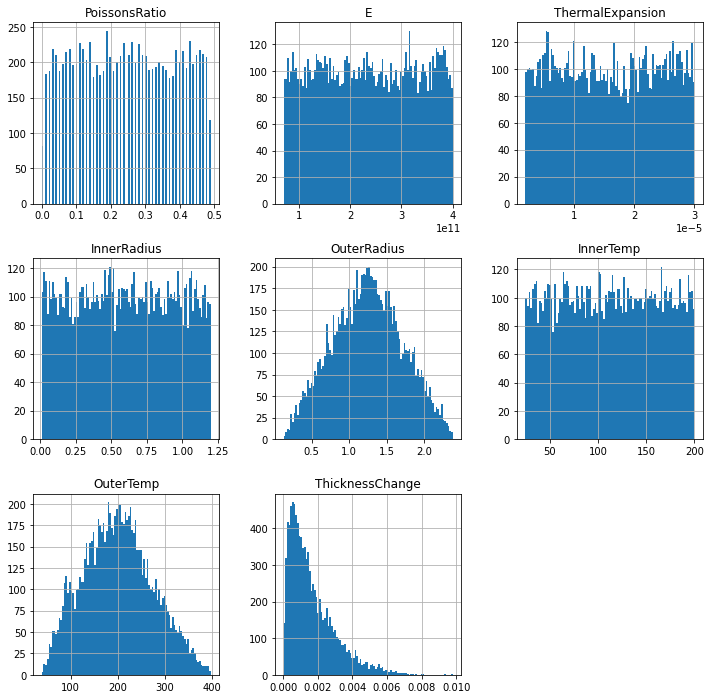

In [ ]:
hist = data.hist(bins=100,figsize=(12,12))

### Correlation Coefficient Table

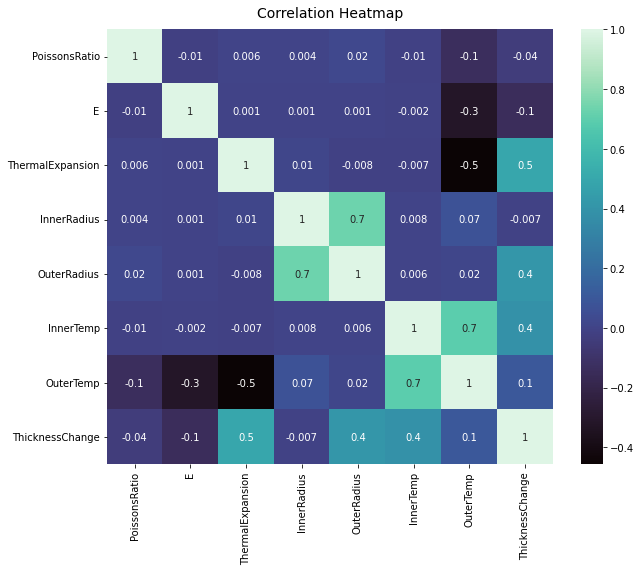

In [ ]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(data.corr(), annot=True, cmap='mako', fmt='.1g')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

In [ ]:
from scipy.stats import entropy

# entropy([pk1, pk2], qk=[qk1, qk2])


Tom = [300,700,100,200]
Eva = [700,300,250,0]

d = {'Tom': Tom, 'Eva': Eva}

df = pd.DataFrame(data=d, index=[0, 1, 2, 3])


print(entropy(Tom/df['Tom'].sum(0)))
print(entropy(Eva/df['Eva'].sum(0)))


1.1569876443452742
0.9890938651821026


In [ ]:
# data = pd.read_excel('40192_2013_16_MOESM1_ESM.xlsx')

# data

In [ ]:
# Relative Entropy Classifier
# REC = 'TT'
# logBase = None

# print(entropy(data[REC]/data[REC].sum(0), base = logBase) - entropy(data[REC]/data[REC].sum(0), 
#                                                                 data['Fatigue']/data['Fatigue'].sum(0), base = logBase))
# print(entropy(data[REC]/data[REC].sum(0), base = logBase))
# print(entropy(data[REC]/data[REC].sum(0), data['Fatigue']/data['Fatigue'].sum(0), base = logBase))


## Test/Validation/Training Set Split

80% training 20% Validation

Begin preparing the dataframe for the regression by randomly splitting the data into test and training sets. 

In [ ]:
data

,PoissonsRatio,E,ThermalExpansion,InnerRadius,OuterRadius,InnerTemp,OuterTemp,ThicknessChange
0,0.05,274963176062,0.000019,0.349704,1.161172,60.850524,121.833290,0.001732
1,0.24,157115249336,0.000016,0.624374,0.883991,128.775652,263.986620,0.000859
2,0.07,201347914159,0.000018,0.503166,0.789903,112.375774,156.150195,0.000707
3,0.22,76687027854,0.000007,1.106494,1.271535,93.803190,287.237049,0.000221
4,0.20,345899561776,0.000029,0.440460,1.151209,163.173818,184.293644,0.003680
...,...,...,...,...,...,...,...,...
9995,0.24,88133103773,0.000021,0.211720,0.318512,26.975601,116.153576,0.000183
9996,0.13,159276320771,0.000005,1.181847,1.890586,193.093802,380.461531,0.001167
9997,0.32,230207049267,0.000009,0.958243,2.149861,172.554720,321.157120,0.002944
9998,0.10,87477571953,0.000028,1.044543,1.599917,166.190199,310.416325,0.004018


In [ ]:
# Use the list of header names to split the dataset into independent and dependent variables

x = data.drop(data.columns[7], axis=1)
y = data['ThicknessChange']
x

,PoissonsRatio,E,ThermalExpansion,InnerRadius,OuterRadius,InnerTemp,OuterTemp
0,0.05,274963176062,0.000019,0.349704,1.161172,60.850524,121.833290
1,0.24,157115249336,0.000016,0.624374,0.883991,128.775652,263.986620
2,0.07,201347914159,0.000018,0.503166,0.789903,112.375774,156.150195
3,0.22,76687027854,0.000007,1.106494,1.271535,93.803190,287.237049
4,0.20,345899561776,0.000029,0.440460,1.151209,163.173818,184.293644
...,...,...,...,...,...,...,...
9995,0.24,88133103773,0.000021,0.211720,0.318512,26.975601,116.153576
9996,0.13,159276320771,0.000005,1.181847,1.890586,193.093802,380.461531
9997,0.32,230207049267,0.000009,0.958243,2.149861,172.554720,321.157120
9998,0.10,87477571953,0.000028,1.044543,1.599917,166.190199,310.416325


In [ ]:
y

0       0.001732
1       0.000859
2       0.000707
3       0.000221
4       0.003680
          ...   
9995    0.000183
9996    0.001167
9997    0.002944
9998    0.004018
9999    0.001768
Name: ThicknessChange, Length: 10000, dtype: float64

### Scale data

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

x_scaled_df = pd.DataFrame(x_scaled)

x_scaled_df.rename(columns = {0:'PoissonsRatio',1:'E',2:'ThermalExpansion',3:'InnerRadius',4:'OuterRadius',5:'InnerTemp',6:'OuterTemp'}, inplace = True)

total_scaled_df = pd.concat([x_scaled_df, y], axis=1)

In [ ]:
# y_scaled = scaler.fit_transform(y.array.reshape(-1, 1))

# y_scaled_inverse = scaler.inverse_transform(y_scaled)
# y_scaled_inverse

### Split Function

In [ ]:

# Set what ratio of the data will be used for training, validation, and testing sets
train_ratio = 0.8
validation_ratio = 0.10
test_ratio = 0.10

# train validation test split
def testValTestSplit(train_ratio,validation_ratio,test_ratio,x_scaled,y):
  # Split the data into training and test sets
  x_train_val, x_test, y_train_val, y_test = train_test_split(x_scaled, y, 
                                                              test_size=1 - train_ratio - validation_ratio)
  # Further split the test set into validation and test sets
  x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, 
                                                    test_size=(1/(train_ratio+validation_ratio))*(1-test_ratio-train_ratio))

  return x_train_val, x_test, y_train_val, y_test, x_train, x_val, y_train, y_val;

x_train_val, x_test, y_train_val, y_test, x_train, x_val, y_train, y_val = testValTestSplit(train_ratio,validation_ratio,test_ratio,x_scaled,y)                

print("Training set: " + str(len(x_train)))
print("Validation set: " + str(len(x_val)))
print("Testing set: " + str(len(x_test)))

print("Training & Validation Combined (for ANN auto validation inclusion): " + str(len(x_train_val)))

Training set: 8000
Validation set: 1000
Testing set: 1000
Training & Validation Combined (for ANN auto validation inclusion): 9000


## Linear Regression & Lasso

### Linear

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# constant added to see if a y-intercept aids in regression
# x_train_constants = sm.add_constant(x_train)
# x_test_constants = sm.add_constant(x_test)

model = sm.OLS(y_train, x_train)
results = model.fit()
# results = model.predict(x_test_constants)

# Summary not working correctly dimension mismatch
# print(results.summary()

pred_linear = results.predict(x_test)

r2_linear =  r2_score(y_test, pred_linear)
RMSE_linear = np.sqrt(metrics.mean_squared_error(y_test, pred_linear))

print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:        ThicknessChange   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                          1.154e+04
Date:                Mon, 25 Jul 2022   Prob (F-statistic):                        0.00
Time:                        00:57:12   Log-Likelihood:                          47443.
No. Observations:                8000   AIC:                                 -9.487e+04
Df Residuals:                    7993   BIC:                                 -9.482e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# Print errors
print('R^2: ', r2_linear)
print('RMSE: ', RMSE_linear)

R^2:  0.7828914159723956
RMSE:  0.0006102470672048722


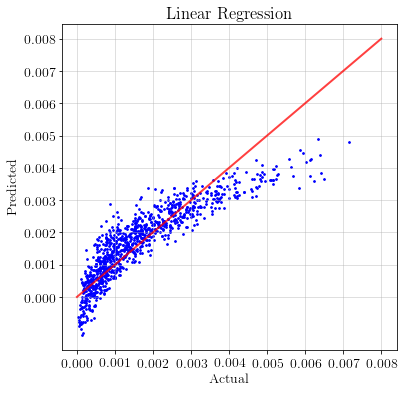

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
x_line = linspace(0,0.008,9)
y_line = x_line
plt.figure(figsize=(6, 6))
plt.plot(x_line, y_line, 'r',linewidth=2, alpha=0.75)
plt.scatter(y_test,pred_linear,c="blue",s=3)
plt.title(r'Linear Regression')
plt.xlabel(r'Actual')
plt.ylabel(r'Predicted')
plt.xticks(x_line)
plt.yticks(x_line)
plt.rcParams.update({'font.size': 14})
plt.grid(True,alpha = 0.5)
plt.savefig('linear actual vs predicted graph.png',dpi = 500)

### Lasso Regression Model

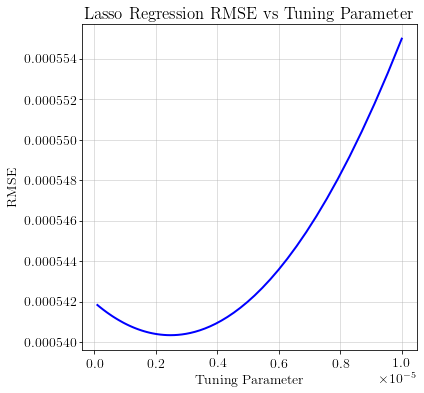

In [ ]:
from sklearn.linear_model import Lasso

# Build an array of values of alpha
alpha_values = np.logspace(-7,-5,100)

# Initialize arrays to store errors at each alpha value
RMSE_lasso  = np.zeros(len(alpha_values))
r2_lasso = np.zeros(len(alpha_values))
# Train a model for each alpha value then calculate and save errors
for i in range(len((alpha_values))):
  lasso_model = Lasso(alpha = alpha_values[i])
  lasso_model.fit(x_train,y_train)
  pred_lasso = lasso_model.predict(x_test)
  #Calculate errors after the new model is trained
  RMSE_lasso[i] = np.sqrt(metrics.mean_squared_error(y_test, pred_lasso))
  r2_lasso[i] =  r2_score(y_test, pred_lasso)
# Plot the errors from each alpha value


# legend = ax.legend(loc='lower center', shadow=True, fontsize='x-large')

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(6, 6))
# plt.plot(alpha_values,r2_lasso,c="blue",linewidth=2,label = '$R^2$')
plt.plot(alpha_values,RMSE_lasso,c="blue",linewidth=2,label = 'Root Mean Squared Error')
plt.title(r'Lasso Regression RMSE vs Tuning Parameter ')
plt.xlabel(r'Tuning Parameter')
plt.ylabel(r'RMSE')
plt.rcParams.update({'font.size': 14})
plt.grid(True,alpha = 0.5)
plt.savefig('lasso tuning sweep RMSE.png',dpi = 500)

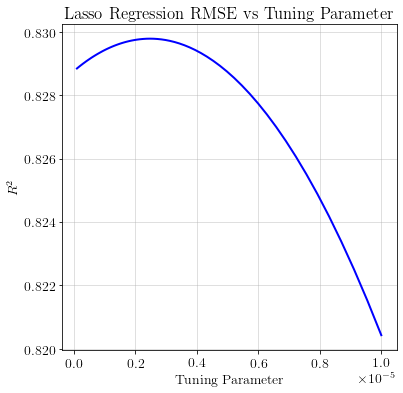

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(6, 6))
plt.plot(alpha_values,r2_lasso,c="blue",linewidth=2,label = '$R^2$')
# plt.plot(alpha_values,RMSE_lasso,c="blue",linewidth=2,label = 'Root Mean Squared Error')
plt.title(r'Lasso Regression RMSE vs Tuning Parameter ')
plt.xlabel(r'Tuning Parameter')
plt.ylabel(r'$R^2$')
plt.rcParams.update({'font.size': 14})
plt.grid(True,alpha = 0.5)
plt.savefig('lasso tuning sweep r2.png',dpi = 500)

In [ ]:
lasso_model = Lasso(alpha = 0.000001)
lasso_model.fit(x_train,y_train)

pred_lasso = lasso_model.predict(x_test)

r2_lasso =  r2_score(y_test, pred_lasso)
RMSE_lasso = np.sqrt(metrics.mean_squared_error(y_test, pred_lasso))
print('Lasso Regression Error:')
print('R^2:', r2_lasso)
print('RMSE:', RMSE_lasso)

Lasso Regression Error:
R^2: 0.8294198512226156
RMSE: 0.0005409180178005936


In [ ]:
x_train_df = pd.DataFrame(x_train)

pd.Series(lasso_model.coef_, index = x_train_df.columns)

0   -0.000080
1   -0.000216
2    0.002930
3   -0.003342
4    0.006032
5    0.000914
6    0.001820
dtype: float64

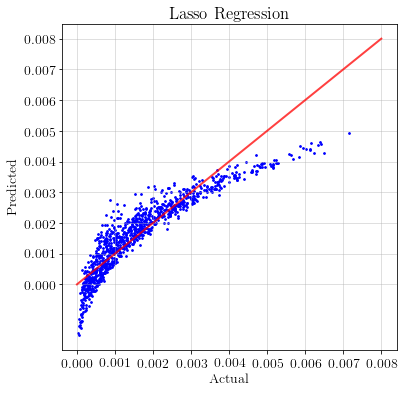

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
x_line = linspace(0,0.008,9)
y_line = x_line
plt.figure(figsize=(6, 6))
plt.plot(x_line, y_line, 'r',linewidth=2, alpha=0.75)
plt.scatter(y_test,pred_lasso,c="blue",s=3)
plt.title(r'Lasso Regression')
plt.xlabel(r'Actual')
plt.ylabel(r'Predicted')
plt.xticks(x_line)
plt.yticks(x_line)
plt.rcParams.update({'font.size': 14})
plt.grid(True,alpha = 0.5)
plt.savefig('lasso actual vs predicted graph.png',dpi = 500)

## K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Set highest number of neighbors for the optimization to check
KNN_Number = 30

# Initialize arrays to store errors for each number of nearest neighbors
RMSE_KNN = np.zeros(KNN_Number)
r2_KNN = np.zeros(KNN_Number)

# Go through each value of nearest neighbor and calculate errors
for i in range(1,KNN_Number):
  # Build the model
  knn = KNeighborsRegressor(n_neighbors=i)
  # Fit the model
  knn.fit(x_train,y_train)
  # Predict from test data
  pred_i = knn.predict(x_test)
  # Calculate errors
  RMSE_KNN[i] = np.sqrt(metrics.mean_squared_error(y_test, pred_i))
  r2_KNN[i] =  r2_score(y_test, pred_i)

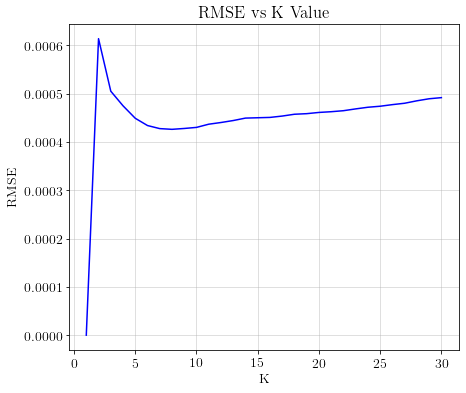

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(6, 6))
plt.plot(range(1,KNN_Number+1),RMSE_KNN, c="blue",label = 'Test')
plt.title(r'RMSE vs K Value')
plt.xlabel(r'K')
plt.ylabel(r'RMSE')
plt.rcParams.update({'font.size': 14})
plt.grid(True,alpha = 0.5)
plt.savefig('knn k sweep RMSE.png',dpi = 500)

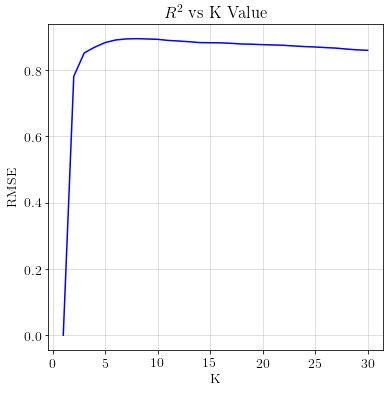

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(6, 6))
plt.plot(range(1,KNN_Number+1),r2_KNN, c="blue",label = 'Test')
plt.title(r'$R^2$ vs K Value')
plt.xlabel(r'K')
plt.ylabel(r'$R^2$')
plt.rcParams.update({'font.size': 14})
plt.grid(True,alpha = 0.5)
plt.savefig('knn k sweep r2.png',dpi = 500)

In [ ]:

# Build the model with an optimal amount of nearest neighbors
knn = KNeighborsRegressor(n_neighbors=6)
knn.fit(x_train, y_train)

pred_KNN = knn.predict(x_test)

RMSE_KNN = np.sqrt(metrics.mean_squared_error(y_test, pred_KNN))
r2_KNN = r2_score(y_test, pred_KNN)

print('KNN Error:')
print('RMSE:', RMSE_KNN)
print('R^2:', r2_KNN)

KNN Error:
RMSE: 0.00042747251359044386
R^2: 0.8934675333248364


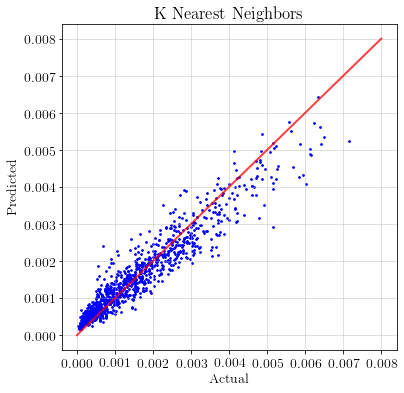

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
x_line = linspace(0,0.008,9)
y_line = x_line
plt.figure(figsize=(6, 6))
plt.plot(x_line, y_line, 'r',linewidth=2, alpha=0.75)
plt.scatter(y_test,pred_KNN,c="blue",s=3)
plt.title(r'K Nearest Neighbors')
plt.xlabel(r'Actual')
plt.ylabel(r'Predicted')
plt.xticks(x_line)
plt.yticks(x_line)
plt.rcParams.update({'font.size': 14})
plt.grid(True,alpha = 0.5)
plt.savefig('KNN actual vs predicted graph.png',dpi = 500)

## Artificial Neural Network

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
import itertools

# min_nodes_per_layer = 1000
# max_nodes_per_layer = 10000
# node_step_size = 1000
# num_layers = 1
 
# node_options = list(range(min_nodes_per_layer, max_nodes_per_layer + 1, node_step_size))
# layer_possibilities = [node_options] * num_layers
# layer_node_permutations = list(itertools.product(*layer_possibilities))

layer_node_permutations = [(4000,4000,4000)]

ANN_GridSearch = GridSearchCV(
    MLPRegressor(verbose = False ,early_stopping= True, n_iter_no_change=5),
    param_grid={"hidden_layer_sizes": layer_node_permutations,
                "activation": ['relu'], 
                "solver": ['adam']
    },
    cv=5,
    verbose=3
)

ANN_GridSearch.fit(x_train_val,y_train_val)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END activation=relu, hidden_layer_sizes=(4000, 4000, 4000), solver=adam;, score=0.961 total time=16.6min
[CV 2/5] END activation=relu, hidden_layer_sizes=(4000, 4000, 4000), solver=adam;, score=0.975 total time=19.5min
[CV 3/5] END activation=relu, hidden_layer_sizes=(4000, 4000, 4000), solver=adam;, score=0.945 total time=15.5min
[CV 4/5] END activation=relu, hidden_layer_sizes=(4000, 4000, 4000), solver=adam;, score=0.966 total time=27.7min
[CV 5/5] END activation=relu, hidden_layer_sizes=(4000, 4000, 4000), solver=adam;, score=0.968 total time=27.7min


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


GridSearchCV(cv=5,
             estimator=MLPRegressor(early_stopping=True, n_iter_no_change=5),
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(4000, 4000, 4000)],
                         'solver': ['adam']},
             verbose=3)

In [ ]:
from sklearn.neural_network import MLPRegressor

# Best 3000,3000,3000 @ 98%
# 3000,3000,3000,3000 @ RMSE: 0.0002020 R^2: 0.978
# 4000,4000,4000 RMSE: 0.000221 R^2: 0.973
# 4000,4000,4000,400 RMSE: 0.0003676 R^2: 0.926
# 5000,5000  RMSE: 0.0001933 R^2: 0.978
# 3000,3000,3000,3000 RMSE: 0.0001806 R^2: 0.981
# 6000,6000 RMSE: 0.0002389 R^2: 0.9673
# 6000,6000,6000 RMSE: 0.0002298 R^2: 0.97
# 3000,3000,3000 RMSE: 0.0001924 R^2: 0.979

architecture = 3000,3000,3000,3000

final_model = MLPRegressor(hidden_layer_sizes=(architecture), 
                  learning_rate='constant',
                  activation='relu', 
                  solver='adam',
                  verbose = True,
                  early_stopping= True,
                  n_iter_no_change=5)

final_model.fit(x_train_val,y_train_val)

Iteration 1, loss = 0.09411015
Validation score: -37.406102
Iteration 2, loss = 0.00163738
Validation score: -0.344352
Iteration 3, loss = 0.00126409
Validation score: 0.823249
Iteration 4, loss = 0.00107610
Validation score: 0.951009
Iteration 5, loss = 0.00098381
Validation score: 0.957041
Iteration 6, loss = 0.00093089
Validation score: 0.945621
Iteration 7, loss = 0.00089377
Validation score: 0.943269
Iteration 8, loss = 0.00086435
Validation score: 0.951989
Iteration 9, loss = 0.00083979
Validation score: 0.971450
Iteration 10, loss = 0.00081876
Validation score: 0.961783
Iteration 11, loss = 0.00080032
Validation score: 0.966687
Iteration 12, loss = 0.00078399
Validation score: 0.951848
Iteration 13, loss = 0.00076935
Validation score: 0.971655
Iteration 14, loss = 0.00075606
Validation score: 0.955078
Iteration 15, loss = 0.00074390
Validation score: 0.968469
Iteration 16, loss = 0.00073271
Validation score: 0.955529
Iteration 17, loss = 0.00072226
Validation score: 0.968647
Ite

MLPRegressor(early_stopping=True, hidden_layer_sizes=(3000, 3000, 3000, 3000),
             n_iter_no_change=5, verbose=True)

In [ ]:
pred_ANN = final_model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

pred_ANN = final_model.predict(x_test)
r_value = r2_score(y_test, pred_ANN)
RMSE_ANN = np.sqrt(metrics.mean_squared_error(y_test, pred_ANN))

print('ANN Error:')
print('RMSE:', RMSE_ANN)
print('R^2:',r_value)

ANN Error:
RMSE: 0.0002196400039687138
R^2: 0.9719197875143422


In [ ]:
import joblib

# save
joblib.dump(final_model, "model.pkl") 

# load
clf2 = joblib.load("model.pkl")

pred_ANN = clf2.predict(x_test)


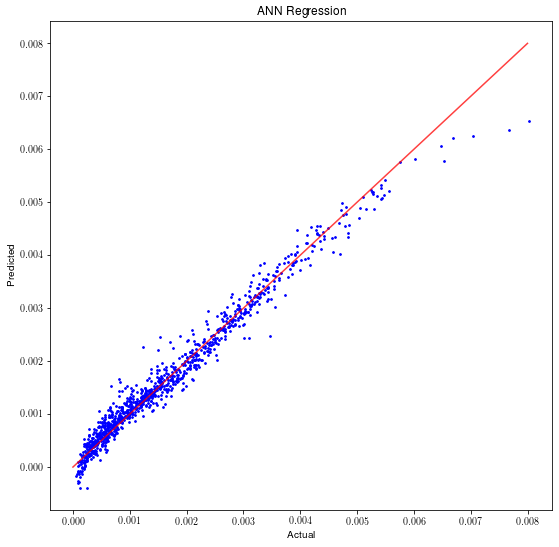

<Figure size 432x288 with 0 Axes>

In [ ]:
x_line = linspace(0,0.008,9)
y_line = x_line
plt.figure(figsize=(9, 9))
plt.plot(x_line, y_line, 'r', alpha=0.75)
plt.scatter(y_test,pred_ANN,c="blue",s=3)
plt.title('ANN Regression')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.xticks(x_line)
plt.yticks(x_line)
plt.rcParams.update({'font.size': 10})
plt.show()

plt.savefig('filename.png')

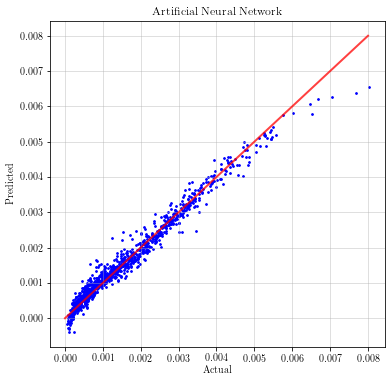

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
x_line = linspace(0,0.008,9)
y_line = x_line
plt.figure(figsize=(6, 6))
plt.plot(x_line, y_line, 'r',linewidth=2, alpha=0.75)
plt.scatter(y_test,pred_ANN,c="blue",s=3)
plt.title(r'Artificial Neural Network')
plt.xlabel(r'Actual')
plt.ylabel(r'Predicted')
plt.xticks(x_line)
plt.yticks(x_line)
plt.rcParams.update({'font.size': 14})
plt.grid(True,alpha = 0.5)
plt.savefig('ANN actual vs predicted graph.png',dpi = 500)

## Support Vector Machine (Regression)

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_kernel_ridge_regression.html#sphx-glr-auto-examples-miscellaneous-plot-kernel-ridge-regression-py

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

# svr = GridSearchCV(
#     SVR(verbose=True),
#     param_grid={"kernel":['poly', 'rbf'],
#                 "degree": [8,9,10,11],
#                 "gamma": ['auto','scale'],
#                 "coef0": [0.8,0.9],
#                 "C": [1], 
#                 "epsilon" : [0.000001]
#                },
#       cv=2,         
#       verbose=3
#       )


# SVM best Parameters: {'C': 1, 'coef0': 0.9, 'degree': 8, 'epsilon': 1e-06, 'gamma': 'scale', 'kernel': 'poly'}

svr = SVR(kernel='poly', degree=8, gamma='scale', 
          coef0=0.9, tol=0.001, C=1.0, epsilon=1e-06, 
          shrinking=True, cache_size=200, verbose=True, max_iter=- 1)

svr.fit(x_train, y_train)

pred_svr = svr.predict(x_test)

RMSE_SVR = np.sqrt(metrics.mean_squared_error(y_test, pred_svr))
r2_SVR = r2_score(y_test, pred_svr)

#print('SVM best Parameters:', svr.best_params_)

print('SVM Error:')
print('RMSE:', RMSE_SVR)
print('R^2:', r2_SVR)

[LibSVM]SVM Error:
RMSE: 9.271779421817503e-05
R^2: 0.9950043443911569


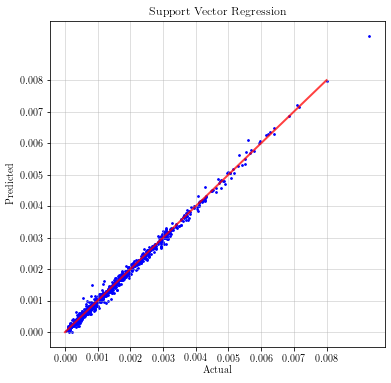

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
x_line = linspace(0,0.008,9)
y_line = x_line
plt.figure(figsize=(6, 6))
plt.plot(x_line, y_line, 'r',linewidth=2, alpha=0.75)
plt.scatter(y_test,pred_svr,c="blue",s=3)
plt.title(r'Support Vector Regression')
plt.xlabel(r'Actual')
plt.ylabel(r'Predicted')
plt.xticks(x_line)
plt.yticks(x_line)
plt.rcParams.update({'font.size': 14})
plt.grid(True,alpha = 0.5)
plt.savefig('SVR actual vs predicted graph.png',dpi = 500)

## Gaussian Proccesses Regression

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

#kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
#gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

gpr = GaussianProcessRegressor()
gpr.fit(x_train_val, y_train_val)

pred_gpr = gpr.predict(x_test)

RMSE_gpr = np.sqrt(metrics.mean_squared_error(y_test, pred_gpr))
r2_gpr = r2_score(y_test, pred_gpr)

print('GPR Error:')
print('RMSE:', RMSE_gpr)
print('R^2:', r2_gpr)

GPR Error:
RMSE: 1.1975126806394307e-06
R^2: 0.9999992307238816


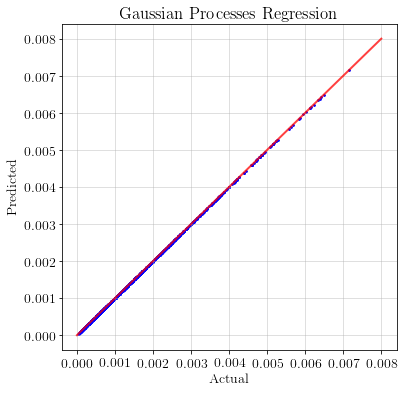

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
x_line = linspace(0,0.008,9)
y_line = x_line
plt.figure(figsize=(6, 6))
plt.plot(x_line, y_line, 'r',linewidth=2, alpha=0.75)
plt.scatter(y_test,pred_gpr,c="blue",s=3)
plt.title(r'Gaussian Processes Regression')
plt.xlabel(r'Actual')
plt.ylabel(r'Predicted')
plt.xticks(x_line)
plt.yticks(x_line)
plt.rcParams.update({'font.size': 14})
plt.grid(True,alpha = 0.5)
plt.savefig('GPR.png',dpi = 500)

## Training Dataset Size Response

In [ ]:
# Set sample size of training dataset
samples = [50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,
           900,950,1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500,1550,
           1600,1650,1700,1750,1800,1850,1900,1950,2000]

#### Linear

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Initialize arrays to store errors
R2_linear = np.zeros(len(samples))
RMSE_linear  = np.zeros(len(samples))

# Train a model for each sample value then calculate and save errors
for i in range(len((samples))):
  # Build subsets
  total_scaled_df_n = total_scaled_df.sample(n=samples[i])
  x_n = total_scaled_df_n.drop(total_scaled_df_n.columns[7], axis=1)
  y_n = total_scaled_df_n['ThicknessChange']
  x_train_val_n, x_test_n, y_train_val_n, y_test_n = train_test_split(x_n, y_n,
                                                              test_size= 1 - train_ratio - validation_ratio)
  x_train_n, x_val_n, y_train_n, y_val_n = train_test_split(x_train_val_n, y_train_val_n, 
                                                  test_size=(1/(train_ratio+validation_ratio))*(1-test_ratio-train_ratio))
  #Train Model
  linear_model_n = sm.OLS(y_train_n, x_train_n.values)
  results = linear_model_n.fit()

  #Evaluate Model
  pred_linear_n = results.predict(x_test)

  R2_linear[i] =  r2_score(y_test, pred_linear_n)
  RMSE_linear[i] = np.sqrt(metrics.mean_squared_error(y_test, pred_linear_n))

# Plot 
# plt.figure(figsize=(8, 8))
# plt.title('Linear Regression Error')
# plt.xlabel('Samples in training set')
# plt.ylabel('$R^2$')
# plt.plot(samples,R2_linear)
# plt.show()


#### Lasso

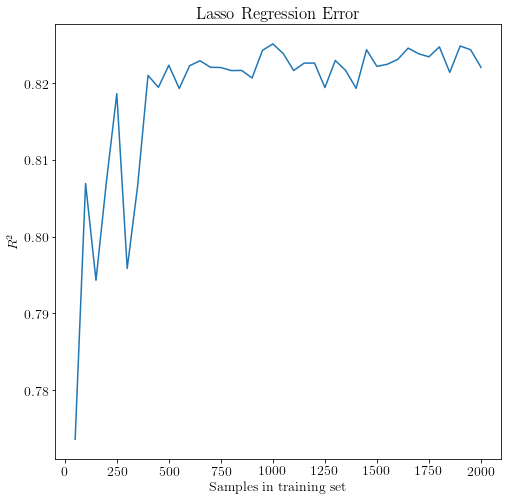

In [ ]:
from sklearn.linear_model import Lasso

# Initialize arrays to store errors
R2_lasso = np.zeros(len(samples))
RMSE_lasso  = np.zeros(len(samples))

# Train a model for each sample value then calculate and save errors
for i in range(len((samples))):
  # Build subsets
  total_scaled_df_n = total_scaled_df.sample(n=samples[i])
  x_n = total_scaled_df_n.drop(total_scaled_df_n.columns[7], axis=1)
  y_n = total_scaled_df_n['ThicknessChange']
  x_train_val_n, x_test_n, y_train_val_n, y_test_n = train_test_split(x_n, y_n,
                                                              test_size= 1 - train_ratio - validation_ratio)
  x_train_n, x_val_n, y_train_n, y_val_n = train_test_split(x_train_val_n, y_train_val_n, 
                                                  test_size=(1/(train_ratio+validation_ratio))*(1-test_ratio-train_ratio))
  #Train Model
  lasso_model_n = Lasso(alpha = 0.000001)
  lasso_model_n.fit(x_train_n.values,y_train_n)

  #Evaluate Model
  pred_lasso_n = lasso_model_n.predict(x_test)

  R2_lasso[i] =  r2_score(y_test, pred_lasso_n)
  RMSE_lasso[i] = np.sqrt(metrics.mean_squared_error(y_test, pred_lasso_n))

# Plot 
plt.figure(figsize=(8, 8))
plt.title('Lasso Regression Error')
plt.xlabel('Samples in training set')
plt.ylabel('$R^2$')
plt.plot(samples,R2_lasso)
plt.show()

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize arrays to store errors
R2_KNN = np.zeros(len(samples))
RMSE_KNN  = np.zeros(len(samples))

# Train a model for each sample value then calculate and save errors
for i in range(len((samples))):
  # Build subsets
  total_scaled_df_n = total_scaled_df.sample(n=samples[i])
  x_n = total_scaled_df_n.drop(total_scaled_df_n.columns[7], axis=1)
  y_n = total_scaled_df_n['ThicknessChange']
  x_train_val_n, x_test_n, y_train_val_n, y_test_n = train_test_split(x_n, y_n,
                                                              test_size= 1 - train_ratio - validation_ratio)
  x_train_n, x_val_n, y_train_n, y_val_n = train_test_split(x_train_val_n, y_train_val_n, 
                                                  test_size=(1/(train_ratio+validation_ratio))*(1-test_ratio-train_ratio))
  #Train Model
  KNN_n = KNeighborsRegressor(6)
  KNN_n.fit(x_train_n.values,y_train_n)

  #Evaluate Model
  pred_KNN_n = KNN_n.predict(x_test)

  R2_KNN[i] =  r2_score(y_test, pred_KNN_n)
  RMSE_KNN[i] = np.sqrt(metrics.mean_squared_error(y_test, pred_KNN_n))

# Plot 
# plt.figure(figsize=(8, 8))
# plt.title('KNN Regression Error')
# plt.xlabel('Samples in training set')
# plt.ylabel('$R^2$')
# plt.plot(samples,R2_KNN)
# plt.show()


#### ANN

Sample Size:  50  R2:  -12.531708582422558  RMSE:  0.005081229804286635
Sample Size:  100  R2:  -218.68822865677717  RMSE:  0.020473680055767742
Sample Size:  150  R2:  -318.3005909604855  RMSE:  0.02468268380837166
Sample Size:  200  R2:  -74.86003777464654  RMSE:  0.012030925735053046
Sample Size:  250  R2:  -0.8398782382825178  RMSE:  0.0018736439281121725
Sample Size:  300  R2:  -15.852593113873592  RMSE:  0.005670559168186641
Sample Size:  350  R2:  -104.0666773714194  RMSE:  0.014158753400853926
Sample Size:  400  R2:  -10.283285118644272  RMSE:  0.004639917940862071
Sample Size:  450  R2:  -6.284413980303205  RMSE:  0.003728119531020474
Sample Size:  500  R2:  -3.9424263247782596  RMSE:  0.003070878407419793
Sample Size:  550  R2:  0.8500217921374745  RMSE:  0.0005349418786358264
Sample Size:  600  R2:  -132.51384024622354  RMSE:  0.015960837003714923
Sample Size:  650  R2:  -6.172094312402519  RMSE:  0.003699265605676015
Sample Size:  700  R2:  -31.406989336244663  RMSE:  0.007

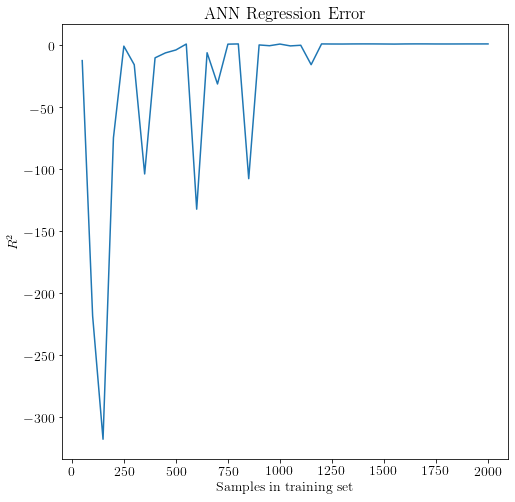

In [ ]:
from sklearn.neural_network import MLPRegressor

architecture = 3000,3000,3000


ANN_n = MLPRegressor(hidden_layer_sizes=(architecture), 
                  learning_rate='constant',
                  activation='relu', 
                  solver='adam',
                  verbose = False,
                  early_stopping= True,
                  n_iter_no_change=3)

# Initialize arrays to store errors
R2_ANN = np.zeros(len(samples))
RMSE_ANN  = np.zeros(len(samples))

# Train a model for each sample value then calculate and save errors
for i in range(len((samples))):
  # Build subsets
  total_scaled_df_n = total_scaled_df.sample(n=samples[i])
  x_n = total_scaled_df_n.drop(total_scaled_df_n.columns[7], axis=1)
  y_n = total_scaled_df_n['ThicknessChange']
  x_train_val_n, x_test_n, y_train_val_n, y_test_n = train_test_split(x_n, y_n,
                                                              test_size= 1 - train_ratio - validation_ratio)
  x_train_n, x_val_n, y_train_n, y_val_n = train_test_split(x_train_val_n, y_train_val_n, 
                                                  test_size=(1/(train_ratio+validation_ratio))*(1-test_ratio-train_ratio))
  #Train Model
  ANN_n.fit(x_train_val_n.values,y_train_val_n)

  #Evaluate Model
  pred_ANN_n = ANN_n.predict(x_test)

  R2_ANN[i] =  r2_score(y_test, pred_ANN_n)
  RMSE_ANN[i] = np.sqrt(metrics.mean_squared_error(y_test, pred_ANN_n))

  print('Sample Size: ',samples[i],' R2: ',R2_ANN[i],' RMSE: ',RMSE_ANN[i])
  

# Plot 
plt.figure(figsize=(8, 8))
plt.title('ANN Regression Error')
plt.xlabel('Samples in training set')
plt.ylabel('$R^2$')
plt.plot(samples,R2_ANN)
plt.show()

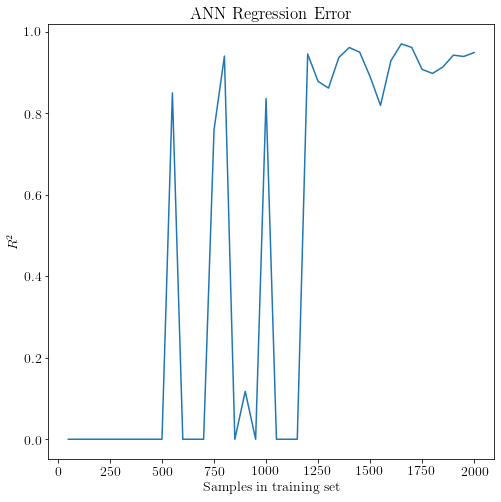

In [ ]:
R2_ANN = R2_ANN.clip(min=0)


# Plot 
plt.figure(figsize=(8, 8))
plt.title('ANN Regression Error')
plt.xlabel('Samples in training set')
plt.ylabel('$R^2$')
plt.plot(samples,R2_ANN)
plt.show()

#### SVR

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

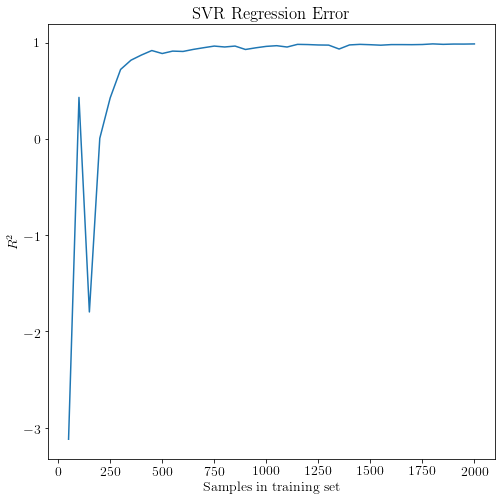

In [ ]:
from sklearn.svm import SVR

SVR_n = SVR(kernel='poly', degree=8, gamma='scale', 
          coef0=0.9, tol=0.001, C=1.0, epsilon=1e-06, 
          shrinking=True, cache_size=200, verbose=True, max_iter=- 1)

# Initialize arrays to store errors
R2_SVR = np.zeros(len(samples))
RMSE_SVR  = np.zeros(len(samples))

# Train a model for each sample value then calculate and save errors
for i in range(len((samples))):
  # Build subsets
  total_scaled_df_n = total_scaled_df.sample(n=samples[i])
  x_n = total_scaled_df_n.drop(total_scaled_df_n.columns[7], axis=1)
  y_n = total_scaled_df_n['ThicknessChange']
  x_train_val_n, x_test_n, y_train_val_n, y_test_n = train_test_split(x_n, y_n,
                                                              test_size= 1 - train_ratio - validation_ratio)
  x_train_n, x_val_n, y_train_n, y_val_n = train_test_split(x_train_val_n, y_train_val_n, 
                                                  test_size=(1/(train_ratio+validation_ratio))*(1-test_ratio-train_ratio))
  #Train Model
  SVR_n.fit(x_train_n.values, y_train_n)

  #Evaluate Model
  pred_SVR_n = SVR_n.predict(x_test)

  R2_SVR[i] =  r2_score(y_test, pred_SVR_n)
  RMSE_SVR[i] = np.sqrt(metrics.mean_squared_error(y_test, pred_SVR_n))

# Plot 
plt.figure(figsize=(8, 8))
plt.title('SVR Regression Error')
plt.xlabel('Samples in training set')
plt.ylabel('$R^2$')
plt.plot(samples,R2_SVR)
plt.show()

In [ ]:
R2_SVR = R2_SVR.clip(min=0)

#### GPR

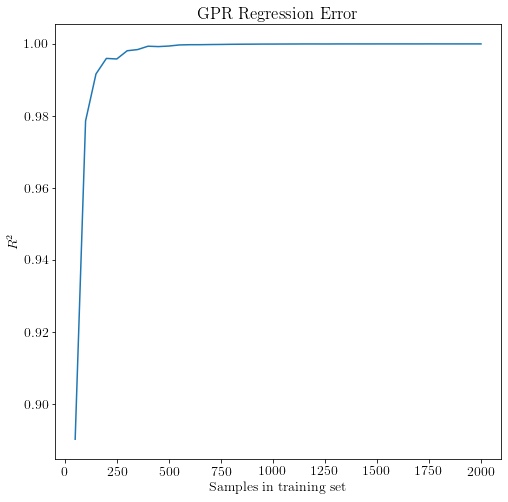

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Initialize arrays to store errors
R2_GPR = np.zeros(len(samples))
RMSE_GPR  = np.zeros(len(samples))

# Train a model for each sample value then calculate and save errors
for i in range(len((samples))):
  # Build subsets
  total_scaled_df_n = total_scaled_df.sample(n=samples[i])
  x_n = total_scaled_df_n.drop(total_scaled_df_n.columns[7], axis=1)
  y_n = total_scaled_df_n['ThicknessChange']
  x_train_val_n, x_test_n, y_train_val_n, y_test_n = train_test_split(x_n, y_n,
                                                              test_size= 1 - train_ratio - validation_ratio)
  x_train_n, x_val_n, y_train_n, y_val_n = train_test_split(x_train_val_n, y_train_val_n, 
                                                  test_size=(1/(train_ratio+validation_ratio))*(1-test_ratio-train_ratio))
  #Train Model
  GPR_n = GaussianProcessRegressor()
  GPR_n.fit(x_train_n.values, y_train_n)

  #Evaluate Model
  pred_GPR_n = GPR_n.predict(x_test)

  R2_GPR[i] =  r2_score(y_test, pred_GPR_n)
  RMSE_GPR[i] = np.sqrt(metrics.mean_squared_error(y_test, pred_GPR_n))

# Plot 
plt.figure(figsize=(8, 8))
plt.title('GPR Regression Error')
plt.xlabel('Samples in training set')
plt.ylabel('$R^2$')
plt.plot(samples,R2_GPR)
plt.show()

### View results

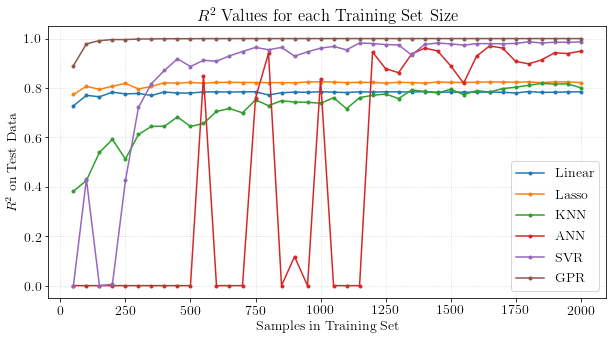

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

markerS = 3
plt.figure(figsize=(10, 5))

plt.title(r'$R^2$ Values for each Training Set Size')
plt.xlabel(r'Samples in Training Set')
plt.ylabel(r'$R^2$ on Test Data')
plt.plot(samples,R2_linear,marker='o',markersize=markerS, label='Linear')
plt.plot(samples,R2_lasso,marker='o',markersize=markerS,label='Lasso')
plt.plot(samples,R2_KNN,marker='o',markersize=markerS,label='KNN')
plt.plot(samples,R2_ANN,marker='o',markersize=markerS,label='ANN')
plt.plot(samples,R2_SVR,marker='o',markersize=markerS,label='SVR')
plt.plot(samples,R2_GPR,marker='o',markersize=markerS,label='GPR')
plt.legend()
plt.rcParams.update({'font.size': 14})
plt.grid(True,alpha = 0.5,linestyle='dotted')
plt.savefig('R2 samples.png',dpi = 500)

In [ ]:
RMSE_ANN = RMSE_ANN.clip(max=0.003)

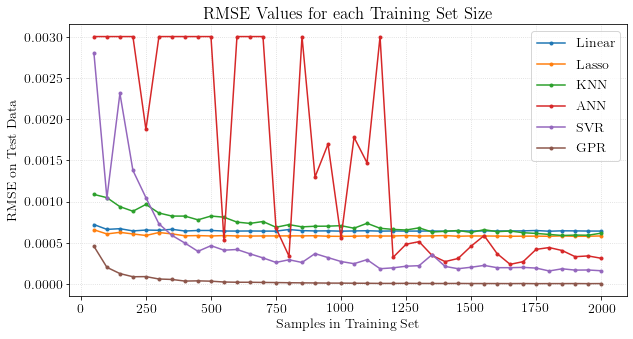

In [ ]:
# Plot 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

markerS = 3

plt.figure(figsize=(10, 5))
plt.title(r'RMSE Values for each Training Set Size')
plt.xlabel(r'Samples in Training Set')
plt.ylabel(r'RMSE on Test Data')
plt.plot(samples,RMSE_linear,marker='o',markersize=markerS, label='Linear')
plt.plot(samples,RMSE_lasso,marker='o',markersize=markerS,label='Lasso')
plt.plot(samples,RMSE_KNN,marker='o',markersize=markerS,label='KNN')
plt.plot(samples,RMSE_ANN,marker='o',markersize=markerS,label='ANN')
plt.plot(samples,RMSE_SVR,marker='o',markersize=markerS,label='SVR')
plt.plot(samples,RMSE_GPR,marker='o',markersize=markerS,label='GPR')
plt.legend()
plt.rcParams.update({'font.size': 14})
plt.grid(True,alpha = 0.5,linestyle='dotted')
plt.savefig('RMSE samples.png',dpi = 500)

## Noise Response

### Set Mean and Standard Deviation of Noise


In [ ]:
# mean = sigma*sqrt(2/pi)
# 0.01 = sigma*sqrt(2/pi)
# 0.01/sqrt(2/pi) = sigma

0.04962392333906325

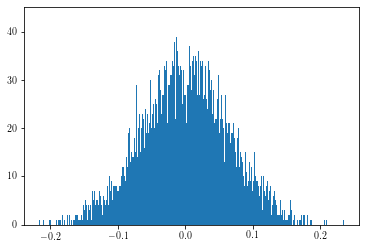

In [ ]:
noise = np.random.normal(0,0.06266571, y_scaled.shape) 

noise_add = np.sum(np.abs(noise))

H,bins = np.histogram(noise,bins=1000)

plt.bar(bins[1:], H,width=0.001)

noise_add/10000

In [ ]:

# Set noise mean, percentage of noise to test, and number instances of data to use
mu = 0
percentNoise = [0.01,0.1,1,1.5,2,2.5,3,3.5,4,4.5,5,7.5,10,12.5,15]
instanceNumber = 3000

# Create new set of data with reduced samples
drop_indices = np.random.choice(x_scaled_df.index, 10000-instanceNumber, replace=False)
x_scaled_df_reducedsamples = x_scaled_df.drop(drop_indices)
y_reducedsamples = y.drop(drop_indices)

print("Number of Samples: ", len(x_scaled_df_reducedsamples))

stdDevArray = np.zeros(len(percentNoise))

# Calculate standard deviations associated with percentage values
for i in range(len(stdDevArray)): 
  stdDevArray[i] = (0.01*percentNoise[i])/np.sqrt(2/np.pi)
print("Standard Deviation Values: ",stdDevArray)

Number of Samples:  3000
Standard Deviation Values:  [1.25331414e-04 1.25331414e-03 1.25331414e-02 1.87997121e-02
 2.50662827e-02 3.13328534e-02 3.75994241e-02 4.38659948e-02
 5.01325655e-02 5.63991362e-02 6.26657069e-02 9.39985603e-02
 1.25331414e-01 1.56664267e-01 1.87997121e-01]


### Linear Noise Test

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Initialize arrays to store errors
RMSE_linear_noise = np.zeros(len(stdDevArray))
r2_linear_noise = np.zeros(len(stdDevArray))

# Train a model for each sample value then calculate and save errors
for i in range(len((stdDevArray))):

  # create & add noise with the same dimension as the input data
  noise = pd.DataFrame().reindex_like(x_scaled_df_reducedsamples)
  noise[["PoissonsRatio","E","ThermalExpansion"]] = np.random.normal(mu, stdDevArray[i], (x_scaled_df_reducedsamples.shape[0],3))
  noise[["InnerRadius","OuterRadius","InnerTemp","OuterTemp"]] = 0

  noisy_data = x_scaled_df_reducedsamples.add(noise)
  noisy_data = noisy_data.clip(lower=0)
  noisy_data = scaler.fit_transform(noisy_data)

  # Build subsets
  x_tv_n, x_test_n, y_tv_n, y_test_n, x_t_n, x_v_n, y_t_n, y_v_n = testValTestSplit(train_ratio,
                                                                            validation_ratio,
                                                                            test_ratio,
                                                                            noisy_data,
                                                                            y_reducedsamples)
  #Train Model
  linear_model_n = sm.OLS(y_t_n, x_t_n)
  results = linear_model_n.fit()

  #Evaluate Model
  pred_linear_n = results.predict(x_test_n)

  # Store Errors
  RMSE_linear_noise[i] = np.sqrt(metrics.mean_squared_error(y_test_n, pred_linear_n))
  r2_linear_noise[i] = r2_score(y_test_n, pred_linear_n)

print(r2_linear_noise)

[0.73517543 0.76158853 0.77262461 0.7820889  0.75453149 0.75417032
 0.78111268 0.77197618 0.76868913 0.77822546 0.76770512 0.71696949
 0.72594462 0.72178205 0.63271655]


### Lasso Noise Test

In [ ]:
from sklearn.linear_model import Lasso

# Initialize arrays to store errors
RMSE_lasso_noise = np.zeros(len(stdDevArray))
r2_lasso_noise = np.zeros(len(stdDevArray))

# Train a model for each sample value then calculate and save errors
for i in range(len((stdDevArray))):

  # create & add noise with the same dimension as the input data
  noise = pd.DataFrame().reindex_like(x_scaled_df_reducedsamples)
  noise[["PoissonsRatio","E","ThermalExpansion"]] = np.random.normal(mu, stdDevArray[i], (x_scaled_df_reducedsamples.shape[0],3))
  noise[["InnerRadius","OuterRadius","InnerTemp","OuterTemp"]] = 0

  noisy_data = x_scaled_df_reducedsamples.add(noise)
  noisy_data = noisy_data.clip(lower=0)
  noisy_data = scaler.fit_transform(noisy_data)

  # Build subsets
  x_tv_n, x_test_n, y_tv_n, y_test_n, x_t_n, x_v_n, y_t_n, y_v_n = testValTestSplit(train_ratio,
                                                                            validation_ratio,
                                                                            test_ratio,
                                                                            noisy_data,
                                                                            y_reducedsamples)
  #Train Model
  lasso_model_n = Lasso(alpha = 0.000000001)
  lasso_model_n.fit(x_t_n,y_t_n)

  #Evaluate Model
  pred_lasso_n = lasso_model_n.predict(x_test_n)

  # Store Errors
  RMSE_lasso_noise[i] = np.sqrt(metrics.mean_squared_error(y_test_n, pred_lasso_n))
  r2_lasso_noise[i] = r2_score(y_test_n, pred_lasso_n)

print(r2_lasso_noise)

[0.8149622  0.81519932 0.81783762 0.81991647 0.81914223 0.83053112
 0.80487961 0.828162   0.79763077 0.79666768 0.78936707 0.80338946
 0.74548455 0.73842616 0.73816718]


### KNN Noise Test

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize arrays to store errors
RMSE_knn_noise = np.zeros(len(stdDevArray))
r2_knn_noise = np.zeros(len(stdDevArray))

# Train a model for each sample value then calculate and save errors
for i in range(len((stdDevArray))):


  # create & add noise with the same dimension as the input data
  noise = pd.DataFrame().reindex_like(x_scaled_df_reducedsamples)
  noise[["PoissonsRatio","E","ThermalExpansion"]] = np.random.normal(mu, stdDevArray[i], (x_scaled_df_reducedsamples.shape[0],3))
  noise[["InnerRadius","OuterRadius","InnerTemp","OuterTemp"]] = 0

  noisy_data = x_scaled_df_reducedsamples.add(noise)
  noisy_data = noisy_data.clip(lower=0)
  noisy_data = scaler.fit_transform(noisy_data)

  # Build subsets
  x_tv_n, x_test_n, y_tv_n, y_test_n, x_t_n, x_v_n, y_t_n, y_v_n = testValTestSplit(train_ratio,
                                                                            validation_ratio,
                                                                            test_ratio,
                                                                            noisy_data,
                                                                            y_reducedsamples)
  #Train Model
  knn_n = KNeighborsRegressor(6)
  knn_n.fit(x_t_n,y_t_n)

  #Evaluate Model
  pred_knn_n = knn_n.predict(x_test_n)

  # Store Errors
  RMSE_knn_noise[i] = np.sqrt(metrics.mean_squared_error(y_test_n, pred_knn_n))
  r2_knn_noise[i] = r2_score(y_test_n, pred_knn_n)

print(RMSE_knn_noise)

[0.00053444 0.000531   0.00057401 0.00055185 0.00053308 0.00056252
 0.00057491 0.00061228 0.00055302 0.00055073 0.00058048 0.00061824
 0.00053563 0.00062054 0.00072578]


### ANN Noise Test

In [ ]:
from sklearn.neural_network import MLPRegressor

architecture = 3000,3000,3000


ann_n = MLPRegressor(hidden_layer_sizes=(architecture), 
                  learning_rate='constant',
                  activation='relu', 
                  solver='adam',
                  verbose = False,
                  early_stopping= True,
                  n_iter_no_change=3)

# Initialize arrays to store errors
RMSE_ann_noise = np.zeros(len(stdDevArray))
r2_ann_noise = np.zeros(len(stdDevArray))

# Train a model for each sample value then calculate and save errors
for i in range(len((stdDevArray))):


  # create & add noise with the same dimension as the input data
  noise = pd.DataFrame().reindex_like(x_scaled_df_reducedsamples)
  noise[["PoissonsRatio","E","ThermalExpansion"]] = np.random.normal(mu, stdDevArray[i], (x_scaled_df_reducedsamples.shape[0],3))
  noise[["InnerRadius","OuterRadius","InnerTemp","OuterTemp"]] = 0

  noisy_data = x_scaled_df_reducedsamples.add(noise)
  noisy_data = noisy_data.clip(lower=0)
  noisy_data = scaler.fit_transform(noisy_data)

  # Build subsets
  x_tv_n, x_test_n, y_tv_n, y_test_n, x_t_n, x_v_n, y_t_n, y_v_n = testValTestSplit(train_ratio,
                                                                            validation_ratio,
                                                                            test_ratio,
                                                                            noisy_data,
                                                                            y_reducedsamples)
  #Train Model
  ann_n.fit(x_tv_n,y_tv_n)

  #Evaluate Model
  pred_ann_n = ann_n.predict(x_test_n)

  # Store Errors
  RMSE_ann_noise[i] = np.sqrt(metrics.mean_squared_error(y_test_n, pred_ann_n))
  r2_ann_noise[i] = r2_score(y_test_n, pred_ann_n)

  print('Standard Deviation: ',stdDevArray[i],' R2: ',r2_ann_noise[i],' RMSE: ',RMSE_ann_noise[i])


Standard Deviation:  0.00012533141373155003  R2:  0.9663163439479214  RMSE:  0.0002486060518957607
Standard Deviation:  0.0012533141373155003  R2:  0.9604423958507116  RMSE:  0.00027534555389459087
Standard Deviation:  0.012533141373155003  R2:  0.9334907697448  RMSE:  0.0003134272482904436
Standard Deviation:  0.018799712059732503  R2:  0.9606551091132259  RMSE:  0.00027039427845312555
Standard Deviation:  0.025066282746310006  R2:  0.9356440273246942  RMSE:  0.00033692614679906973
Standard Deviation:  0.031332853432887504  R2:  0.9145809245976427  RMSE:  0.0003894505691851505
Standard Deviation:  0.03759942411946501  R2:  0.9348133912431472  RMSE:  0.00033386560549269567
Standard Deviation:  0.04386599480604251  R2:  0.9447264098470557  RMSE:  0.00029830140940733746
Standard Deviation:  0.05013256549262001  R2:  0.9149082930204337  RMSE:  0.0003699591976964184
Standard Deviation:  0.05639913617919751  R2:  0.9333793302278197  RMSE:  0.00033428807201279907
Standard Deviation:  0.06266

In [ ]:
# r2_ann_noise = [0.9442608038143806,
#                 0.9467446534606172,
#                 0.9268713736398564,
#                 0.916566044115161,
#                 0.9087494703601594,
#                 0.9047183344525629,
#                 0.8606174147753133,
#                 0.8573907844470796,
#                 0.8112326714506963,
#                 0.8121515975450858,
#                 0.7731612322689341,
#                 0.7467299768074813,
#                 0.7202557940777329]



# RMSE_ann_noise = [0.00032014827423323245,
#                   0.00028704456971138167,
#                   0.0003726957589494196,
#                   0.000358182439867108,
#                   0.00042210759541135066,
#                   0.0004269081869324125,
#                   0.0005123117016832445,
#                   0.0005173711590784166,
#                   0.0005965668052410917,
#                   0.0005691992700029443,
#                   0.0006643516996081232,
#                   0.0006216975408731055,
#                   0.0006804849807540899]

### SVR Noise Test

In [ ]:
from sklearn.svm import SVR

# Set max interations for noise response due to long training times if unbounded
svr_n = SVR(kernel='rbf', degree=8, gamma='scale', 
          coef0=0.9, tol=0.001, C=0.5, epsilon=5e-05, 
          shrinking=True, cache_size=1000, verbose=True, max_iter= 100000)

# Initialize arrays to store errors
RMSE_svr_noise = np.zeros(len(stdDevArray))
r2_svr_noise = np.zeros(len(stdDevArray))

# Train a model for each sample value then calculate and save errors
for i in range(len((stdDevArray))):

  # create & add noise with the same dimension as the input data
  noise = pd.DataFrame().reindex_like(x_scaled_df_reducedsamples)
  noise[["PoissonsRatio","E","ThermalExpansion"]] = np.random.normal(mu, stdDevArray[i], (x_scaled_df_reducedsamples.shape[0],3))
  noise[["InnerRadius","OuterRadius","InnerTemp","OuterTemp"]] = 0

  noisy_data = x_scaled_df_reducedsamples.add(noise)
  noisy_data = noisy_data.clip(lower=0)
  noisy_data = scaler.fit_transform(noisy_data)

  # Build subsets
  x_tv_n, x_test_n, y_tv_n, y_test_n, x_t_n, x_v_n, y_t_n, y_v_n = testValTestSplit(train_ratio,
                                                                            validation_ratio,
                                                                            test_ratio,
                                                                            noisy_data,
                                                                            y_reducedsamples)
  #Train Model
  svr_n.fit(x_t_n, np.ravel(y_t_n))

  #Evaluate Model
  pred_svr_n = svr_n.predict(x_test_n)

  # Store Errors
  RMSE_svr_noise[i] = np.sqrt(metrics.mean_squared_error(y_test_n, pred_svr_n))
  r2_svr_noise[i] = r2_score(y_test_n, pred_svr_n)

  print("Percent Noise: ", percentNoise[i], " R^2: ", r2_svr_noise[i])



[LibSVM]Percent Noise:  0.01  R^2:  0.9825390747250317
[LibSVM]Percent Noise:  0.1  R^2:  0.9802366945296559
[LibSVM]Percent Noise:  1  R^2:  0.9798609966974017
[LibSVM]Percent Noise:  1.5  R^2:  0.9753355119816783
[LibSVM]Percent Noise:  2  R^2:  0.9826362903398069
[LibSVM]Percent Noise:  2.5  R^2:  0.9814913816152157
[LibSVM]Percent Noise:  3  R^2:  0.9568529098741111
[LibSVM]Percent Noise:  3.5  R^2:  0.9504994933489052
[LibSVM]Percent Noise:  4  R^2:  0.9395854252846517
[LibSVM]Percent Noise:  4.5  R^2:  0.9413171958126267
[LibSVM]Percent Noise:  5  R^2:  0.943130740677203
[LibSVM]Percent Noise:  7.5  R^2:  0.9083923529390078
[LibSVM]Percent Noise:  10  R^2:  0.8990210134961847
[LibSVM]Percent Noise:  12.5  R^2:  0.8167387811948712
[LibSVM]Percent Noise:  15  R^2:  0.7751720232566216


### GPR Noise Test

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel

# Initialize arrays to store errors
RMSE_gpr_noise = np.zeros(len(stdDevArray))
r2_gpr_noise = np.zeros(len(stdDevArray))

# Train a model for each sample value then calculate and save errors
for i in range(len((stdDevArray))):


  # create & add noise with the same dimension as the input data
  noise = pd.DataFrame().reindex_like(x_scaled_df_reducedsamples)
  noise[["PoissonsRatio","E","ThermalExpansion"]] = np.random.normal(mu, stdDevArray[i], (x_scaled_df_reducedsamples.shape[0],3))
  noise[["InnerRadius","OuterRadius","InnerTemp","OuterTemp"]] = 0

  noisy_data = x_scaled_df_reducedsamples.add(noise)
  noisy_data = noisy_data.clip(lower=0)
  noisy_data = scaler.fit_transform(noisy_data)

  # Build subsets
  x_tv_n, x_test_n, y_tv_n, y_test_n, x_t_n, x_v_n, y_t_n, y_v_n = testValTestSplit(train_ratio,
                                                                            validation_ratio,
                                                                            test_ratio,
                                                                            noisy_data,
                                                                            y_reducedsamples)
  
  basic_kernel = RBF()
  noise_kernel = 0.1**2 * RBF(length_scale=0.1) + WhiteKernel(
  noise_level=0.1**2, noise_level_bounds=(1e-9, 1)
  )
  total_kernel = (basic_kernel + noise_kernel)
  #Train Model
  gpr_n = GaussianProcessRegressor(kernel=total_kernel, normalize_y=False)
  gpr_n.fit(x_tv_n, y_tv_n)

  #Evaluate Model
  pred_gpr_n = gpr_n.predict(x_test_n)

  # Store Errors
  RMSE_gpr_noise[i] = np.sqrt(metrics.mean_squared_error(y_test_n, pred_gpr_n))
  r2_gpr_noise[i] = r2_score(y_test_n, pred_gpr_n)

  print("Percent Noise: ", percentNoise[i], " R2: ", r2_gpr_noise[i])

print(r2_gpr_noise)

/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:437: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__length_scale is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__noise_level is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


Percent Noise:  0.01  R2:  0.99992587757708


/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k2__noise_level is close to the specified lower bound 1e-09. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


Percent Noise:  0.1  R2:  0.9999046170779807
Percent Noise:  1  R2:  0.9982996884342457
Percent Noise:  1.5  R2:  0.9965896703062294


/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Percent Noise:  2  R2:  0.9955736891268777


/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/_gpr.py:610: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)


Percent Noise:  2.5  R2:  0.992505971963754
Percent Noise:  3  R2:  0.9880981024676768
Percent Noise:  3.5  R2:  0.9888747273382823


/usr/local/lib/python3.7/dist-packages/sklearn/gaussian_process/kernels.py:427: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__k1__k1__constant_value is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  ConvergenceWarning,


Percent Noise:  4  R2:  0.9807870606339327
Percent Noise:  4.5  R2:  0.975431430406299
Percent Noise:  5  R2:  0.9757356035385398
Percent Noise:  7.5  R2:  0.9501856916379129
Percent Noise:  10  R2:  0.9191235063563494
Percent Noise:  12.5  R2:  0.9045806124700564
Percent Noise:  15  R2:  0.8380799830335702
[0.99992588 0.99990462 0.99829969 0.99658967 0.99557369 0.99250597
 0.9880981  0.98887473 0.98078706 0.97543143 0.9757356  0.95018569
 0.91912351 0.90458061 0.83807998]


### Graph Results

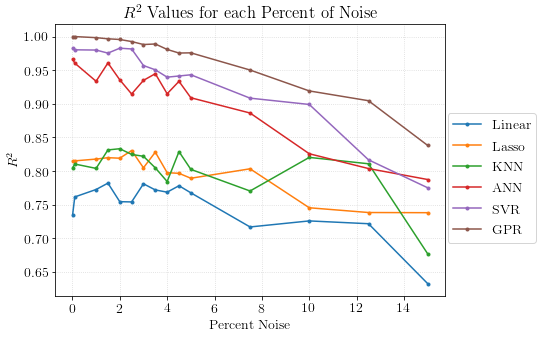

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

r2_lasso_noise = r2_lasso_noise.clip(min=0)
r2_gpr_noise = r2_gpr_noise.clip(min=0)
r2_svr_noise = r2_svr_noise.clip(min=0)
r2_ann_noise = r2_ann_noise.clip(min=0)

markerS = 3
plt.figure(figsize=(7, 5))

plt.title(r'$R^2$ Values for each Percent of Noise')
plt.xlabel(r'Percent Noise')
plt.ylabel(r'$R^2$')
plt.plot(percentNoise,r2_linear_noise,marker='o',markersize=markerS,label='Linear')
plt.plot(percentNoise,r2_lasso_noise,marker='o',markersize=markerS,label='Lasso')
plt.plot(percentNoise,r2_knn_noise,marker='o',markersize=markerS,label='KNN')
plt.plot(percentNoise,r2_ann_noise,marker='o',markersize=markerS,label='ANN')
plt.plot(percentNoise,r2_svr_noise,marker='o',markersize=markerS,label='SVR')
plt.plot(percentNoise,r2_gpr_noise,marker='o',markersize=markerS,label='GPR')
plt.legend(loc='upper right',bbox_to_anchor=(1.25,0.7), 
          ncol=1)
plt.rcParams.update({'font.size': 14})
plt.grid(True,alpha = 0.5,linestyle='dotted')
plt.savefig('R2 noise.png',dpi = 500, bbox_inches='tight')

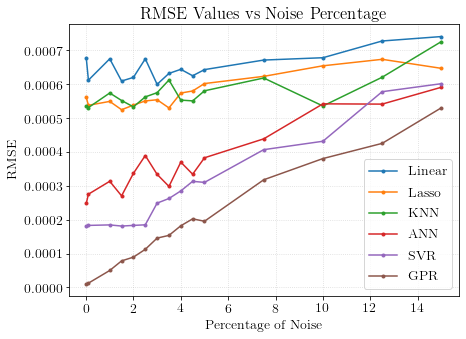

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

RMSE_gpr_noise = RMSE_gpr_noise.clip(max=0.001)
RMSE_ann_noise = RMSE_ann_noise.clip(max=0.001)
RMSE_svr_noise = RMSE_svr_noise.clip(max=0.001)

markerS = 3
plt.figure(figsize=(7, 5))

plt.title(r'RMSE Values vs Noise Percentage')
plt.xlabel(r'Percentage of Noise')
plt.ylabel(r'RMSE')
plt.plot(percentNoise,RMSE_linear_noise,marker='o',markersize=markerS,label='Linear')
plt.plot(percentNoise,RMSE_lasso_noise,marker='o',markersize=markerS,label='Lasso')
plt.plot(percentNoise,RMSE_knn_noise,marker='o',markersize=markerS,label='KNN')
plt.plot(percentNoise,RMSE_ann_noise,marker='o',markersize=markerS,label='ANN')
plt.plot(percentNoise,RMSE_svr_noise,marker='o',markersize=markerS,label='SVR')
plt.plot(percentNoise,RMSE_gpr_noise,marker='o',markersize=markerS,label='GPR')
plt.legend()
plt.rcParams.update({'font.size': 14})
plt.grid(True,alpha = 0.5,linestyle='dotted')
plt.savefig('RMSE noise.png',dpi = 500)

ValueError: ignored

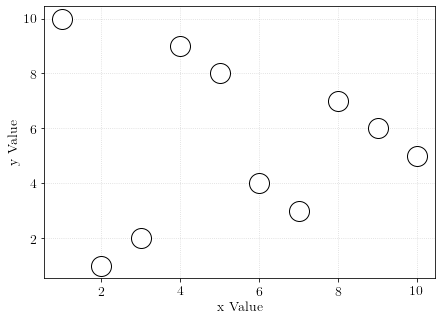

In [ ]:
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')

# markerS = 3
# plt.figure(figsize=(7, 5))

# x_knn_example = [1,2,3,4,5,6,7,8,9,10]
# y_knn_example = [10,1,2,9,8,4,3,7,6,5]
# z_knn_example = [5,4,6,3,7,2,8,1,9,10]



# plt.xlabel(r'x Value')
# plt.ylabel(r'y Value')
# plt.scatter(x_knn_example,y_knn_example, s=400, c='white' ,edgecolors='black',zorder=3)
# plt.rcParams.update({'font.size': 14})
# plt.grid(True,alpha = 0.5,linestyle='dotted')

# for i, txt in enumerate(z_knn_example):
#     plt.annotate(z_knn_example[i], (x_knn_example[i], y_knn_example[i]))

# plt.savefig('KNN example graph.png',dpi = 500)

## GPR Sensitivity Analysis

In [ ]:
!pip install SAlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 756 kB 9.4 MB/s 
     |████████████████████████████████| 76 kB 6.8 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 


In [ ]:
from SALib.analyze import sobol
from SALib.sample import saltelli
from SALib.test_functions import Ishigami
from SALib.analyze import morris

# problem = {
#     'num_vars': 3,
#     'names': ['x1', 'x2', 'x3'],
#     'bounds': [[-3.14159265359, 3.14159265359],
#                [-3.14159265359, 3.14159265359],
#                [-3.14159265359, 3.14159265359]]
# }

# param_values = saltelli.sample(problem, 1024,calc_second_order=False)

# Y = np.zeros([param_values.shape[0]])

# Y = Ishigami.evaluate(param_values)

# Si = sobol.analyze(problem, Y)

# Si



problem ={'num_vars': 7,
          'names': ['PoissonsRatio', 'E', 'ThermalExpansion', 'InnerRadius', 'OuterRadius', 'InnerTemp', 'OuterTemp'],
          'bounds': [[0, 1]]*7}

param_values = saltelli.sample(problem, 1024)

pred_gpr = gpr.predict(param_values)

sensitivity_dict = sobol.analyze(problem, pred_gpr)

sensitivity_dict


{'S1': array([-1.23598620e-04, -1.31811353e-05,  1.20644080e-01,  1.29447008e-01,
         3.94378617e-01,  3.86560554e-04,  9.96326327e-02]),
 'S1_conf': array([0.00090728, 0.0007707 , 0.05593937, 0.04049974, 0.0595186 ,
        0.00452925, 0.03691165]),
 'S2': array([[        nan,  0.00026337,  0.00048449,  0.00064359,  0.00095221,
          0.00029033, -0.00014515],
        [        nan,         nan,  0.0003056 ,  0.00058019,  0.00073243,
          0.00041394,  0.00068156],
        [        nan,         nan,         nan,  0.01476868,  0.09148246,
         -0.00641341,  0.01220372],
        [        nan,         nan,         nan,         nan, -0.0056781 ,
          0.00220874,  0.04255608],
        [        nan,         nan,         nan,         nan,         nan,
         -0.0092549 ,  0.05542111],
        [        nan,         nan,         nan,         nan,         nan,
                 nan,  0.00442974],
        [        nan,         nan,         nan,         nan,         nan,
    

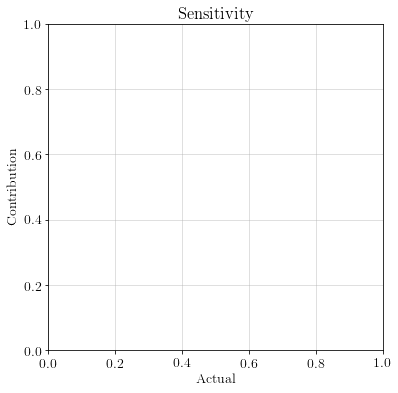

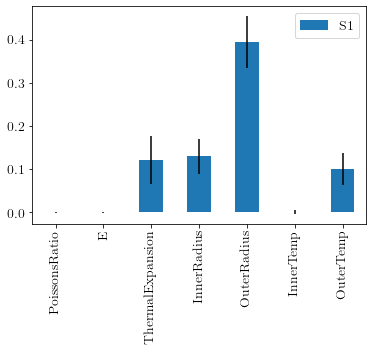

In [ ]:
from SALib.plotting.bar import plot as barplot


plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.figure(figsize=(6, 6))
plt.title(r'Sensitivity')
plt.xlabel(r'Actual')
plt.ylabel(r'Contribution')
plt.rcParams.update({'font.size': 14})
plt.grid(True,alpha = 0.5)
plt.savefig('SA.png',dpi = 500)

total, first, second = sensitivity_dict.to_df()
barplot(first)


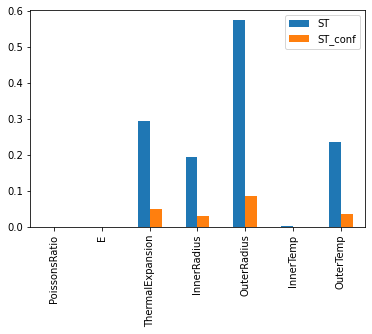

In [ ]:
ax = total.plot.bar()

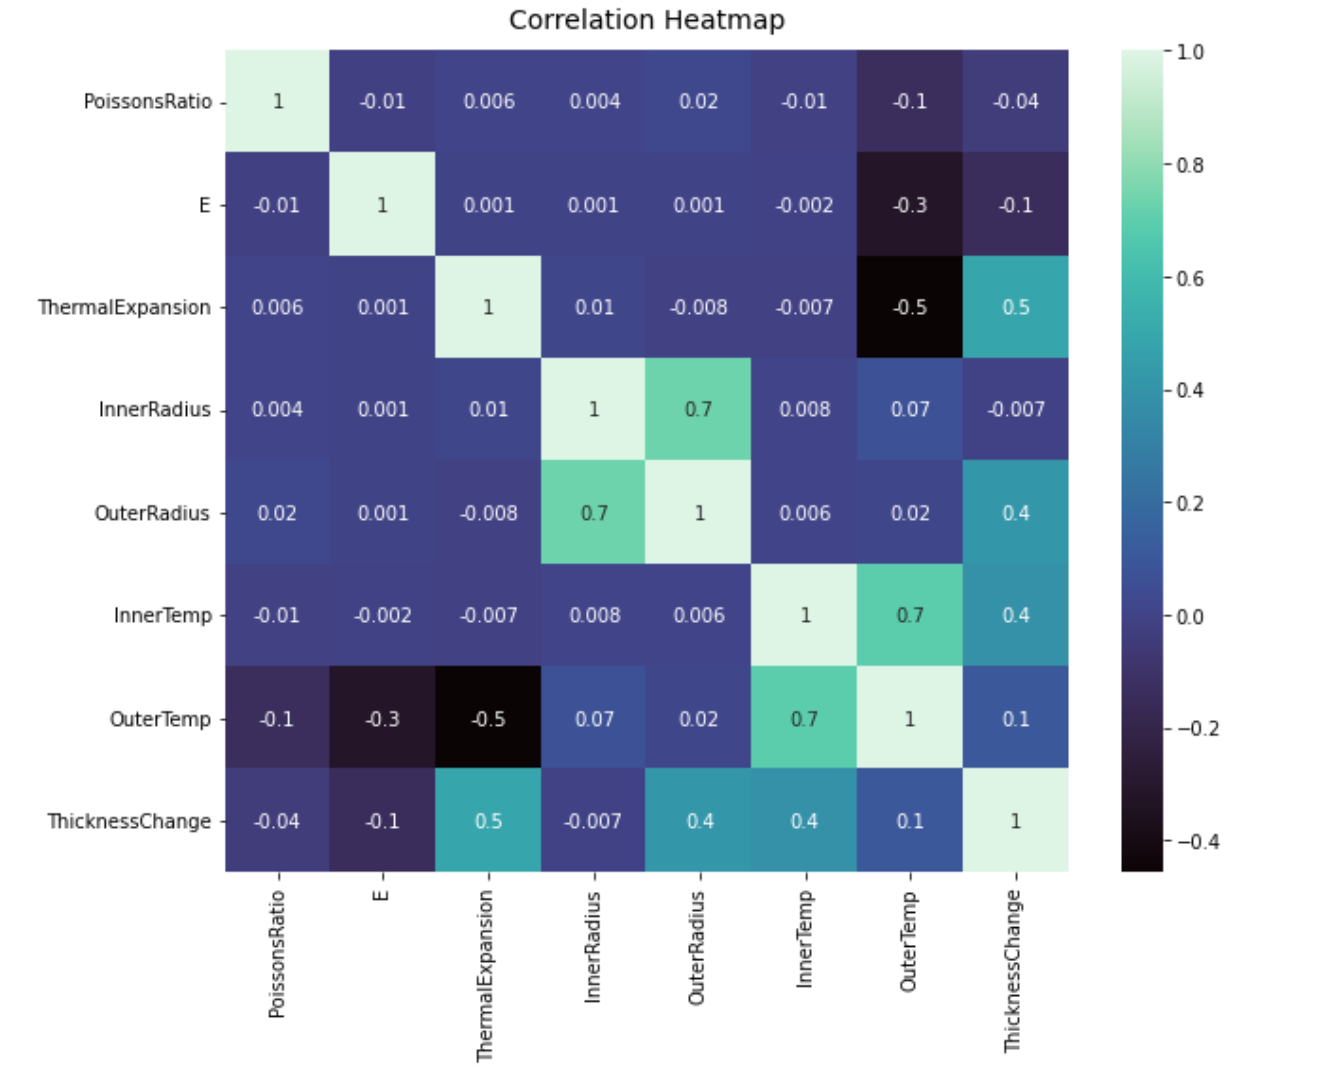

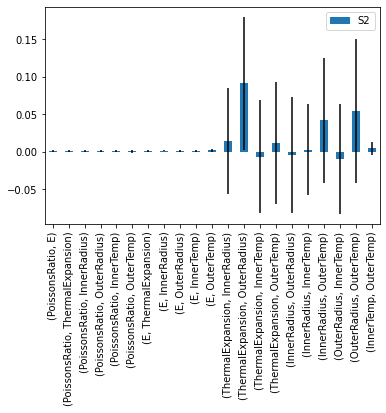

In [ ]:
barplot(second)

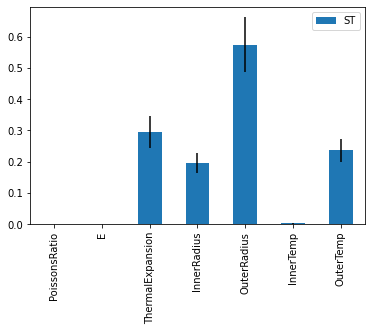

In [ ]:
barplot(total)

 https://machinelearningmastery.com/how-to-improve-deep-learning-model-robustness-by-adding-noise/

## Final Errors for each prediction type

In [ ]:
# Setting these errors to the constants that were calculated originally
# The values change too much when running the full notebook to take screenshots
#   for the report

MAE_reduced = 70.6
MSE_reduced = 8340
RMSE_reduced = 91.3

MAE_Lasso = 24
MSE_Lasso = 1233
RMSE_Lasso = 35

MAE_ANN = 35
MSE_ANN = 2598
RMSE_ANN = 51

MAE_KNN = 49
MSE_KNN = 3346
RMSE_KNN = 58

MAE_tree = 56.17
MSE_tree = 5850.8
RMSE_tree = 76.5


print("Linear Regression Errors:")
print('MAE:', MAE_reduced)
print('MSE:', MSE_reduced)
print('RMSE:', RMSE_reduced)
print("\n")

print('Lasso Regression Error:')
print('MAE:', MAE_Lasso)
print('MSE:', MSE_Lasso)
print('RMSE:', RMSE_Lasso)
print("\n")

print('ANN Errors:')
print('MAE:', MAE_ANN)
print('MSE:', MSE_ANN)
print('RMSE:', RMSE_ANN)
print("\n")

print('KNN Errors:')
print('MAE:', MAE_KNN)
print('MSE:', MSE_KNN)
print('RMSE:', RMSE_KNN)

Linear Regression Errors:
MAE: 70.6
MSE: 8340
RMSE: 91.3


Lasso Regression Error:
MAE: 24
MSE: 1233
RMSE: 35


ANN Errors:
MAE: 35
MSE: 2598
RMSE: 51


KNN Errors:
MAE: 49
MSE: 3346
RMSE: 58


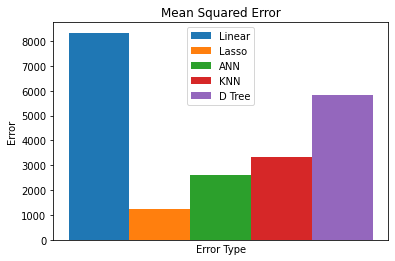

In [ ]:
tree_other = [MAE_tree,RMSE_tree]

plt.bar(MSE-0.2, MSE_reduced, 0.1, label = 'Linear')
plt.bar(MSE-0.1, MSE_Lasso, 0.1, label = 'Lasso')
plt.bar(MSE, MSE_ANN, 0.1, label = 'ANN')
plt.bar(MSE+0.1, MSE_KNN, 0.1, label = 'KNN')
plt.bar(MSE+0.2, MSE_tree, 0.1, label = 'D Tree')
  
X = ['MSE']
X_axis = np.arange(len(X))
plt.xticks(X_axis, X)
plt.xlabel("Error Type")
plt.ylabel("Error")
plt.title("Mean Squared Error")
plt.legend()
plt.show()

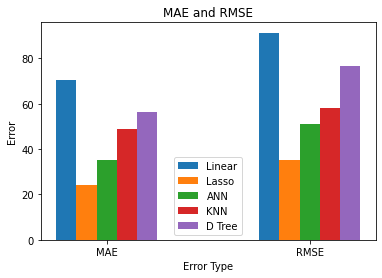

In [ ]:
X = ['MAE','RMSE']

LinearRegression_other = [MAE_reduced,RMSE_reduced]
LassoRegression_other = [MAE_Lasso,RMSE_Lasso]
ANN_other = [MAE_ANN,RMSE_ANN]
KNN_other = [MAE_KNN,RMSE_KNN]
tree_other = [MAE_tree,RMSE_tree]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, LinearRegression_other, 0.1, label = 'Linear')
plt.bar(X_axis - 0.1, LassoRegression_other, 0.1, label = 'Lasso')
plt.bar(X_axis, ANN_other, 0.1, label = 'ANN')
plt.bar(X_axis + 0.1, KNN_other, 0.1, label = 'KNN')
plt.bar(X_axis + 0.2, tree_other, 0.1, label = 'D Tree')
  
plt.xticks(X_axis, X)
plt.xlabel("Error Type")
plt.ylabel("Error")
plt.title("MAE and RMSE")
plt.legend()
plt.show()

## Production Ready Model

### All data used model

In [ ]:
data = pd.read_csv('ShellThickness_10000pts_seed92.csv')
data = data.drop([data.columns[0],data.columns[9],data.columns[10],data.columns[11],data.columns[12]], axis=1)

In [ ]:
data_prm = pd.read_csv('ShellThickness_500pts_seed92.csv')
data_prm = data_prm.drop([data_prm.columns[0],data_prm.columns[9],data_prm.columns[10]], axis=1)
data_prm

,PoissonsRatio,E,ThermalExpansion,InnerRadius,OuterRadius,InnerTemp,OuterTemp,ThicknessChange
0,0.15,703556489607,0.000013,0.026180,0.666769,93.219377,86.428296,0.000740
1,0.17,429951993278,0.000025,0.093890,1.053510,79.339004,67.650631,0.001666
2,0.24,372666533738,0.000011,0.297640,0.925950,118.643663,212.499691,0.001365
3,0.09,28265918538,0.000018,0.821595,1.329975,49.715362,112.781852,0.000825
4,0.27,237927244101,0.000020,0.443618,1.406136,46.384460,210.544332,0.003513
...,...,...,...,...,...,...,...,...
495,0.15,20768182052,0.000012,0.976583,1.353283,110.241567,141.752196,0.000571
496,0.21,620052345742,0.000021,1.094651,2.163870,186.680348,167.777135,0.003873
497,0.21,389587121143,0.000016,0.636677,1.669312,83.406562,236.245816,0.003398
498,0.21,287159249885,0.000027,1.042685,1.498753,117.403334,89.830528,0.001242


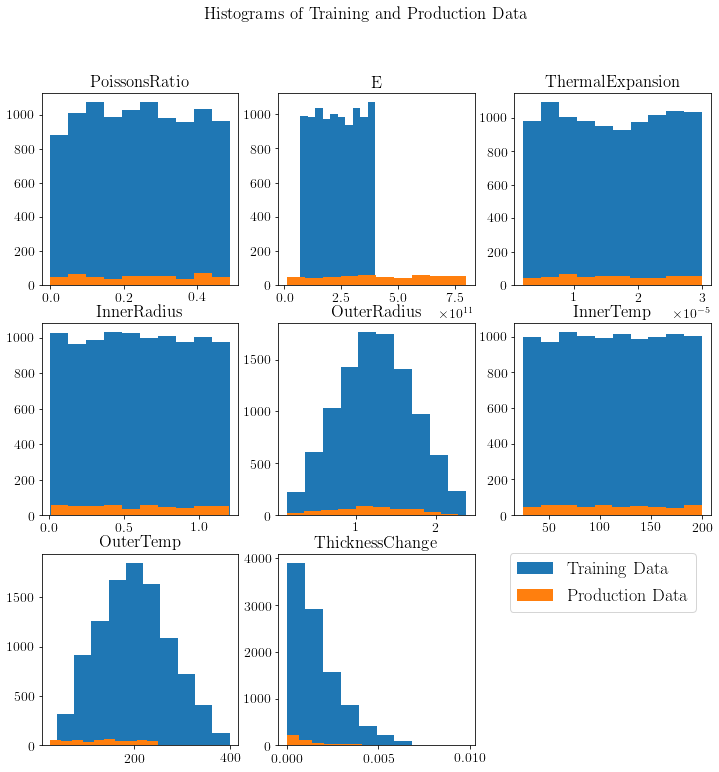

In [ ]:
fig, axs = plt.subplots(3,3,figsize = (12,12))
fig.suptitle("Histograms of Training and Production Data")
axs[0, 0].hist(data['PoissonsRatio'],label='Training Data')
axs[0, 0].hist(data_prm["PoissonsRatio"],label='Production Data')
axs[0, 0].set_title('PoissonsRatio')
axs[0, 1].hist(data['E'])
axs[0, 1].hist(data_prm["E"])
axs[0, 1].set_title('E')
axs[0, 2].hist(data['ThermalExpansion'])
axs[0, 2].hist(data_prm["ThermalExpansion"])
axs[0, 2].set_title('ThermalExpansion')

axs[1, 0].hist(data['InnerRadius'])
axs[1, 0].hist(data_prm["InnerRadius"])
axs[1, 0].set_title('InnerRadius')
axs[1, 1].hist(data['OuterRadius'])
axs[1, 1].hist(data_prm["OuterRadius"])
axs[1, 1].set_title('OuterRadius')
axs[1, 2].hist(data['InnerTemp'])
axs[1, 2].hist(data_prm["InnerTemp"])
axs[1, 2].set_title('InnerTemp')

axs[2, 0].hist(data['OuterTemp'])
axs[2, 0].hist(data_prm["OuterTemp"])
axs[2, 0].set_title('OuterTemp')
axs[2, 1].hist(data['ThicknessChange'],label='Training Data')
axs[2, 1].hist(data_prm["ThicknessChange"],label='Production Data')
axs[2, 1].set_title('ThicknessChange')
axs[2, 1].legend(loc='upper center', prop={'size': 18}, bbox_to_anchor=(1.65, 1.05))
axs[2,2].axis('off')
plt.savefig('PRM.png',dpi = 500)

In [ ]:
# Construct predictor and target arrays
x = data.drop(data.columns[7], axis=1)
y = data['ThicknessChange']

x_prm = data_prm.drop(data_prm.columns[7], axis=1)
y_prm = data_prm['ThicknessChange']
x_prm

scaler = MinMaxScaler()

# Scale the data
x_scaled = scaler.fit_transform(x)
x_prm_scaled = scaler.fit_transform(x_prm)

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel

# kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
# gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# basic_kernel = RBF(length_scale=0.1)
# noise_kernel = 0.1**2 * RBF(length_scale=0.01) + WhiteKernel(
# noise_level=0.1**2, noise_level_bounds=(1e-9, 1e9)
# )
# total_kernel = (basic_kernel + noise_kernel)
# gpr = GaussianProcessRegressor(kernel=total_kernel, normalize_y=False)

gpr = GaussianProcessRegressor()
gpr.fit(x_scaled, y)

pred_gpr = gpr.predict(x_prm_scaled)

RMSE_gpr = np.sqrt(metrics.mean_squared_error(y_prm, pred_gpr))
r2_gpr = r2_score(y_prm, pred_gpr)

print('Production Ready Model Error:')
print('RMSE:', RMSE_gpr)
print('R^2:', r2_gpr)

Production Ready Model Error:
RMSE: 0.0011509725828575611
R^2: 0.2496771095972269


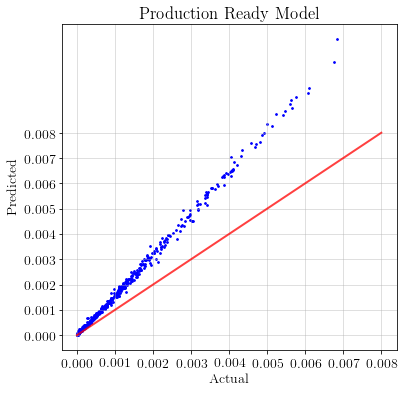

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
x_line = linspace(0,0.008,9)
y_line = x_line
plt.figure(figsize=(6, 6))
plt.plot(x_line, y_line, 'r',linewidth=2, alpha=0.75)
plt.scatter(y_prm,pred_gpr,c="blue",s=3)
plt.title(r'Production Ready Model')
plt.xlabel(r'Actual')
plt.ylabel(r'Predicted')
plt.xticks(x_line)
plt.yticks(x_line)
plt.rcParams.update({'font.size': 14})
plt.grid(True,alpha = 0.5)
plt.savefig('PRM full dataset predicted vs actual.png',dpi = 500)

### Model with dropped values

In [ ]:
data.max(axis=0)

PoissonsRatio       4.900000e-01
E                   3.999924e+11
ThermalExpansion    3.000000e-05
InnerRadius         1.199824e+00
OuterRadius         2.378643e+00
InnerTemp           1.999798e+02
OuterTemp           3.981654e+02
ThicknessChange     9.795600e-03
dtype: float64

In [ ]:
data_prm.max(axis=0)

PoissonsRatio       4.900000e-01
E                   7.991857e+11
ThermalExpansion    2.996000e-05
InnerRadius         1.198684e+00
OuterRadius         2.281874e+00
InnerTemp           1.994125e+02
OuterTemp           2.498705e+02
ThicknessChange     6.838771e-03
dtype: float64

In [ ]:
data.min(axis=0)

PoissonsRatio       0.000000e+00
E                   7.002708e+10
ThermalExpansion    2.000000e-06
InnerRadius         1.021842e-02
OuterRadius         1.263400e-01
InnerTemp           2.501833e+01
OuterTemp           3.861052e+01
ThicknessChange     2.968492e-05
dtype: float64

In [ ]:
# Drop data from prm values that are outside training value range
data_prm_dropped = data_prm[data_prm['E'] <= 400000000000]
data_prm_dropped = data_prm_dropped[data_prm_dropped['E'] >= 70000000000]
data_prm_dropped = data_prm_dropped[data_prm_dropped['OuterTemp'] >= 38.6]

# Drop data from training value range that will be outside range of prm data

data = data[data['OuterRadius'] <= 2.28]
data = data[data['ThicknessChange'] <= 6.84e-03]
data = data[data['OuterTemp'] <= 249.8]

# Construct predictor and target arrays
x = data.drop(data.columns[7], axis=1)
y = data['ThicknessChange']

x_prm = data_prm_dropped.drop(data_prm_dropped.columns[7], axis=1)
y_prm = data_prm_dropped['ThicknessChange']
x_prm

,PoissonsRatio,E,ThermalExpansion,InnerRadius,OuterRadius,InnerTemp,OuterTemp
2,0.24,372666533738,0.000011,0.297640,0.925950,118.643663,212.499691
4,0.27,237927244101,0.000020,0.443618,1.406136,46.384460,210.544332
6,0.13,237400962694,0.000008,0.475706,0.486784,68.548172,70.660691
7,0.28,307047632011,0.000026,0.216469,0.645365,58.249786,169.140201
10,0.26,114776939154,0.000030,0.323520,0.531048,148.514853,213.943230
...,...,...,...,...,...,...,...
481,0.32,313487392073,0.000011,0.825257,1.942581,159.557579,43.621081
494,0.42,379964245483,0.000018,0.295546,0.308374,57.428626,171.138990
497,0.21,389587121143,0.000016,0.636677,1.669312,83.406562,236.245816
498,0.21,287159249885,0.000027,1.042685,1.498753,117.403334,89.830528


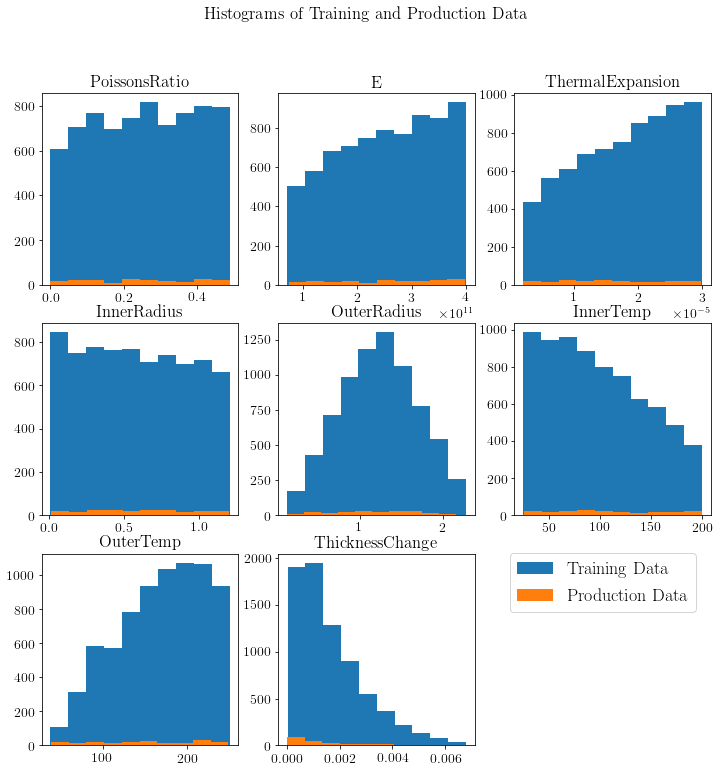

In [ ]:
fig, axs = plt.subplots(3,3,figsize = (12,12))
fig.suptitle("Histograms of Training and Production Data")
axs[0, 0].hist(data['PoissonsRatio'],label='Training Data')
axs[0, 0].hist(data_prm_dropped["PoissonsRatio"],label='Production Data')
axs[0, 0].set_title('PoissonsRatio')
axs[0, 1].hist(data['E'])
axs[0, 1].hist(data_prm_dropped["E"])
axs[0, 1].set_title('E')
axs[0, 2].hist(data['ThermalExpansion'])
axs[0, 2].hist(data_prm_dropped["ThermalExpansion"])
axs[0, 2].set_title('ThermalExpansion')

axs[1, 0].hist(data['InnerRadius'])
axs[1, 0].hist(data_prm_dropped["InnerRadius"])
axs[1, 0].set_title('InnerRadius')
axs[1, 1].hist(data['OuterRadius'])
axs[1, 1].hist(data_prm_dropped["OuterRadius"])
axs[1, 1].set_title('OuterRadius')
axs[1, 2].hist(data['InnerTemp'])
axs[1, 2].hist(data_prm_dropped["InnerTemp"])
axs[1, 2].set_title('InnerTemp')

axs[2, 0].hist(data['OuterTemp'])
axs[2, 0].hist(data_prm_dropped["OuterTemp"])
axs[2, 0].set_title('OuterTemp')
axs[2, 1].hist(data['ThicknessChange'],label='Training Data')
axs[2, 1].hist(data_prm_dropped["ThicknessChange"],label='Production Data')
axs[2, 1].set_title('ThicknessChange')
axs[2, 1].legend(loc='upper center', prop={'size': 18}, bbox_to_anchor=(1.65, 1.05))
axs[2,2].axis('off')
plt.savefig('PRM_dropped_histogram.png',dpi = 500)

In [ ]:
scaler = MinMaxScaler()

# Scale the data
x_scaled = scaler.fit_transform(x)
x_prm_scaled = scaler.fit_transform(x_prm)

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import WhiteKernel

# kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
# gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# basic_kernel = RBF(length_scale=0.1)
# noise_kernel = 0.1**2 * RBF(length_scale=0.01) + WhiteKernel(
# noise_level=0.1**2, noise_level_bounds=(1e-9, 1e9)
# )
# total_kernel = (basic_kernel + noise_kernel)
# gpr = GaussianProcessRegressor(kernel=total_kernel, normalize_y=False)

gpr = GaussianProcessRegressor()
gpr.fit(x_scaled, y)

pred_gpr = gpr.predict(x_prm_scaled)

RMSE_gpr = np.sqrt(metrics.mean_squared_error(y_prm, pred_gpr))
r2_gpr = r2_score(y_prm, pred_gpr)

print('Production Ready Model Error:')
print('RMSE:', RMSE_gpr)
print('R^2:', r2_gpr)

Production Ready Model Error:
RMSE: 0.00022368972919110776
R^2: 0.9698491487467826


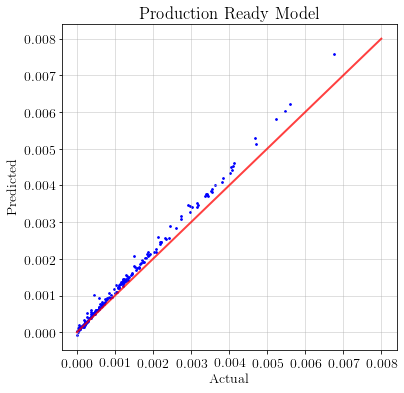

In [ ]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
x_line = linspace(0,0.008,9)
y_line = x_line
plt.figure(figsize=(6, 6))
plt.plot(x_line, y_line, 'r',linewidth=2, alpha=0.75)
plt.scatter(y_prm,pred_gpr,c="blue",s=3)
plt.title(r'Production Ready Model')
plt.xlabel(r'Actual')
plt.ylabel(r'Predicted')
plt.xticks(x_line)
plt.yticks(x_line)
plt.rcParams.update({'font.size': 14})
plt.grid(True,alpha = 0.5)
plt.savefig('PRM predicted vs actual.png',dpi = 500)